## WEEK 1:

### DATA IMPORT:

In [3]:
import twint
import os
import pandas as pd
from glob import glob
import nest_asyncio
nest_asyncio.apply()
import collections
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 100
import seaborn as sns
import re
import preprocessor as p
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
re.compile('<title>(.*)</title>')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from wordcloud import WordCloud
import gensim
from gensim import corpora, models, similarities
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\suval\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suval\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


ModuleNotFoundError: No module named 'wordcloud'

In [2]:
keywords =(r'Keywords - Health Technology.xlsx') 

In [3]:
df_keywords = pd.read_excel(keywords)

In [4]:
df_keywords

Keywords
0   adaptive decision support
1                   algorithm
2     artificial intelligence
3                  blockchain
4         case identification
..                        ...
68           virtual medicine
69            virtual scribes
70              virtual visit
71        wearable technology
72                  web-based

[73 rows x 1 columns]

In [6]:
for i in df_keywords['Keywords']:
    search_words = i
    c = twint.Config()
    c.Lang = 'en'
    c.Locations = 'True'
    c.Search = i, "COVID"
    c.Since = '2019-02-01'
    c.Until = '2020-03-31'
    c.Show_hashtags = 'True'
    c.User_full = 'True'
    c.Store_csv = True
    c.Hide_output = True
    c.Output = os.path.join(result_dir, 'all_tweets.csv')
    twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[!] No more data! Scraping w

In [7]:
keywords = pd.read_csv('../Data/Twitter Data/all_tweets.csv')
tweets = keywords[['tweet']]
tweets.head()

### DATA PRE-PROCESSING:

In [13]:
tweets['tokenized_tweet'] = tweets.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)

C:\Users\SUVALE~1\AppData\Local\Temp/ipykernel_10284/3174055135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['tokenized_tweet'] = tweets.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)


### DATA CLEANING:

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SuvaleenaPaul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stop = stopwords.words('english')
tweets['stopwords_removed'] = tweets['tokenized_tweet'].apply(lambda y: [item for item in y if item.lower() not in stop])

C:\Users\SUVALE~1\AppData\Local\Temp/ipykernel_10284/1959259268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['stopwords_removed'] = tweets['tokenized_tweet'].apply(lambda y: [item for item in y if item.lower() not in stop])


In [16]:
tweets.head()

tweet  \
0     I’ve canceled this trip today due to @covid bu...   
1     @NeuCare I know, but the algorithms of all the...   
2     @rism_81  so seems Dr. Fauci ‘s group analyzed...   
3     My PPE algorithm: 1) surgical masks when outsi...   
4     @sproietti81 @EUplatinum @AmerUrological @mari...   
...                                                 ...   
4593  An interactive web-based dashboard to track CO...   
4594  An interactive web-based dashboard to track CO...   
4595  WELL Launches Automated Phone, SMS and Web-bas...   
4596  Web conferencing platforms at risk of being lu...   
4597  An interactive web-based dashboard to track CO...   

                                        tokenized_tweet  \
0     [I, ’, ve, canceled, this, trip, today, due, t...   
1     [@, NeuCare, I, know, ,, but, the, algorithms,...   
2     [@, rism_81, so, seems, Dr., Fauci, ‘, s, grou...   
3     [My, PPE, algorithm, :, 1, ), surgical, masks,...   
4     [@, sproietti81, @, EUplatinum, @, AmerUrologi...   
...                                                 ...   
4593  [An, interactive, web-based, dashboard, to, tr...   
4594  [An, interactive, web-based, dashboard, to, tr...   
4595  [WELL, Launches, Automated, Phone, ,, SMS, and...   
4596  [Web, conferencing, platforms, at, risk, of, b...   
4597  [An, interactive, web-based, dashboard, to, tr...   

                                      stopwords_removed  
0     [’, canceled, trip, today, due, @, covid, ,, @...  
1     [@, NeuCare, know, ,, algorithms, covid-19, as...  
2     [@, rism_81, seems, Dr., Fauci, ‘, group, anal...  
3     [PPE, algorithm, :, 1, ), surgical, masks, out...  
4     [@, sproietti81, @, EUplatinum, @, AmerUrologi...  
...                                                 ...  
4593  [interactive, web-based, dashboard, track, COV...  
4594  [interactive, web-based, dashboard, track, COV...  
4595  [WELL, Launches, Automated, Phone, ,, SMS, Web...  
4596  [Web, conferencing, platforms, risk, lure, phi...  
4597  [interactive, web-based, dashboard, track, COV...  

[4598 rows x 3 columns]

In [18]:
tweets['punctuations_removed'] = tweets['stopwords_removed'].apply(lambda y: [re.sub(r'[^A-Za-z0-9]+', '', item) for item in y])

C:\Users\SUVALE~1\AppData\Local\Temp/ipykernel_10284/3619127512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['punctuations_removed'] = tweets['stopwords_removed'].apply(lambda y: [re.sub(r'[^A-Za-z0-9]+', '', item) for item in y])


In [19]:
tweets['punctuations_removed'] = tweets['punctuations_removed'].apply(lambda y: [item for item in y if item])

C:\Users\SUVALE~1\AppData\Local\Temp/ipykernel_10284/3555718443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['punctuations_removed'] = tweets['punctuations_removed'].apply(lambda y: [item for item in y if item])


In [20]:
tweets.head()

tweet  \
0     I’ve canceled this trip today due to @covid bu...   
1     @NeuCare I know, but the algorithms of all the...   
2     @rism_81  so seems Dr. Fauci ‘s group analyzed...   
3     My PPE algorithm: 1) surgical masks when outsi...   
4     @sproietti81 @EUplatinum @AmerUrological @mari...   
...                                                 ...   
4593  An interactive web-based dashboard to track CO...   
4594  An interactive web-based dashboard to track CO...   
4595  WELL Launches Automated Phone, SMS and Web-bas...   
4596  Web conferencing platforms at risk of being lu...   
4597  An interactive web-based dashboard to track CO...   

                                        tokenized_tweet  \
0     [I, ’, ve, canceled, this, trip, today, due, t...   
1     [@, NeuCare, I, know, ,, but, the, algorithms,...   
2     [@, rism_81, so, seems, Dr., Fauci, ‘, s, grou...   
3     [My, PPE, algorithm, :, 1, ), surgical, masks,...   
4     [@, sproietti81, @, EUplatinum, @, AmerUrologi...   
...                                                 ...   
4593  [An, interactive, web-based, dashboard, to, tr...   
4594  [An, interactive, web-based, dashboard, to, tr...   
4595  [WELL, Launches, Automated, Phone, ,, SMS, and...   
4596  [Web, conferencing, platforms, at, risk, of, b...   
4597  [An, interactive, web-based, dashboard, to, tr...   

                                      stopwords_removed  \
0     [’, canceled, trip, today, due, @, covid, ,, @...   
1     [@, NeuCare, know, ,, algorithms, covid-19, as...   
2     [@, rism_81, seems, Dr., Fauci, ‘, group, anal...   
3     [PPE, algorithm, :, 1, ), surgical, masks, out...   
4     [@, sproietti81, @, EUplatinum, @, AmerUrologi...   
...                                                 ...   
4593  [interactive, web-based, dashboard, track, COV...   
4594  [interactive, web-based, dashboard, track, COV...   
4595  [WELL, Launches, Automated, Phone, ,, SMS, Web...   
4596  [Web, conferencing, platforms, risk, lure, phi...   
4597  [interactive, web-based, dashboard, track, COV...   

                                   punctuations_removed  
0     [canceled, trip, today, due, covid, JetBlue, w...  
1     [NeuCare, know, algorithms, covid19, assessmen...  
2     [rism81, seems, Dr, Fauci, group, analyzed, ne...  
3     [PPE, algorithm, 1, surgical, masks, outside, ...  
4     [sproietti81, EUplatinum, AmerUrological, mari...  
...                                                 ...  
4593  [interactive, webbased, dashboard, track, COVI...  
4594  [interactive, webbased, dashboard, track, COVI...  
4595  [WELL, Launches, Automated, Phone, SMS, Webbas...  
4596  [Web, conferencing, platforms, risk, lure, phi...  
4597  [interactive, webbased, dashboard, track, COVI...  

[4598 rows x 4 columns]

In [21]:
def join_all():
    x = ' '.join(tweets["punctuations_removed"])

In [22]:
tweets['clean_tweet'] = tweets['punctuations_removed'].apply(lambda y: ' '.join(y))

C:\Users\SUVALE~1\AppData\Local\Temp/ipykernel_10284/2218610271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['clean_tweet'] = tweets['punctuations_removed'].apply(lambda y: ' '.join(y))


In [23]:
tweets.head()

tweet  \
0     I’ve canceled this trip today due to @covid bu...   
1     @NeuCare I know, but the algorithms of all the...   
2     @rism_81  so seems Dr. Fauci ‘s group analyzed...   
3     My PPE algorithm: 1) surgical masks when outsi...   
4     @sproietti81 @EUplatinum @AmerUrological @mari...   
...                                                 ...   
4593  An interactive web-based dashboard to track CO...   
4594  An interactive web-based dashboard to track CO...   
4595  WELL Launches Automated Phone, SMS and Web-bas...   
4596  Web conferencing platforms at risk of being lu...   
4597  An interactive web-based dashboard to track CO...   

                                        tokenized_tweet  \
0     [I, ’, ve, canceled, this, trip, today, due, t...   
1     [@, NeuCare, I, know, ,, but, the, algorithms,...   
2     [@, rism_81, so, seems, Dr., Fauci, ‘, s, grou...   
3     [My, PPE, algorithm, :, 1, ), surgical, masks,...   
4     [@, sproietti81, @, EUplatinum, @, AmerUrologi...   
...                                                 ...   
4593  [An, interactive, web-based, dashboard, to, tr...   
4594  [An, interactive, web-based, dashboard, to, tr...   
4595  [WELL, Launches, Automated, Phone, ,, SMS, and...   
4596  [Web, conferencing, platforms, at, risk, of, b...   
4597  [An, interactive, web-based, dashboard, to, tr...   

                                      stopwords_removed  \
0     [’, canceled, trip, today, due, @, covid, ,, @...   
1     [@, NeuCare, know, ,, algorithms, covid-19, as...   
2     [@, rism_81, seems, Dr., Fauci, ‘, group, anal...   
3     [PPE, algorithm, :, 1, ), surgical, masks, out...   
4     [@, sproietti81, @, EUplatinum, @, AmerUrologi...   
...                                                 ...   
4593  [interactive, web-based, dashboard, track, COV...   
4594  [interactive, web-based, dashboard, track, COV...   
4595  [WELL, Launches, Automated, Phone, ,, SMS, Web...   
4596  [Web, conferencing, platforms, risk, lure, phi...   
4597  [interactive, web-based, dashboard, track, COV...   

                                   punctuations_removed  \
0     [canceled, trip, today, due, covid, JetBlue, w...   
1     [NeuCare, know, algorithms, covid19, assessmen...   
2     [rism81, seems, Dr, Fauci, group, analyzed, ne...   
3     [PPE, algorithm, 1, surgical, masks, outside, ...   
4     [sproietti81, EUplatinum, AmerUrological, mari...   
...                                                 ...   
4593  [interactive, webbased, dashboard, track, COVI...   
4594  [interactive, webbased, dashboard, track, COVI...   
4595  [WELL, Launches, Automated, Phone, SMS, Webbas...   
4596  [Web, conferencing, platforms, risk, lure, phi...   
4597  [interactive, webbased, dashboard, track, COVI...   

                                            clean_tweet  
0     canceled trip today due covid JetBlue want tim...  
1     NeuCare know algorithms covid19 assessments se...  
2     rism81 seems Dr Fauci group analyzed new data ...  
3     PPE algorithm 1 surgical masks outside near pe...  
4     sproietti81 EUplatinum AmerUrological mariobas...  
...                                                 ...  
4593  interactive webbased dashboard track COVID19 r...  
4594  interactive webbased dashboard track COVID19 r...  
4595  WELL Launches Automated Phone SMS Webbased COV...  
4596  Web conferencing platforms risk lure phishing ...  
4597  interactive webbased dashboard track COVID19 r...  

[4598 rows x 5 columns]

### DATA MODELLING:

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(tweets['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

<>:4: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \w
C:\Users\SUVALE~1\AppData\Local\Temp/ipykernel_10284/301448797.py:4: DeprecationWarning: invalid escape sequence \w
  vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')


In [28]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [29]:
model.fit(tf)

LatentDirichletAllocation(random_state=0)

In [30]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [31]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0           covid           581.8         https           949.5       covid19   
1        patients           240.4       covid19           848.6         https   
2              19           202.0        health           595.8            de   
3           cases           178.4   coronavirus           202.3            la   
4            risk           144.9    technology           195.7       digital   
5          people           126.2       digital           165.0    diagnostic   
6            even            70.6    healthcare           150.2            en   
7       hospitals            69.7           via           143.9            le   
8           death            66.8      pandemic           131.9   coronavirus   
9  identification            62.1       medical           118.3           les   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0           373.0       covid19           526.8       covid19           348.3   
1           331.9         https           409.6           amp           282.1   
2           275.1          data           240.2        health           245.1   
3           130.7           amp           145.9            nt           156.2   
4            95.0          time           114.5             s           119.2   
5            86.4        social            96.1        please           110.0   
6            73.1          real            94.2    prevention            65.7   
7            72.1     dashboard            91.1         covid            64.7   
8            68.0   coronavirus            90.5          help            64.6   
9            61.1         media            76.6         https            59.4   

   Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0        covid19           596.3         https           345.2       covid19   
1          https           545.0       covid19           320.2         https   
2        contact           241.0    monitoring           299.0         covid   
3        tracing           204.1       patient           212.2      everyone   
4  cybersecurity           165.9        remote           187.1        making   
5          could           101.7      patients           127.5          data   
6       learning            98.7          care            96.1          stay   
7              s            72.1    telehealth            84.2          home   
8       patients            71.9    blockchain            66.1          week   
9        testing            67.5          need            62.0      patients   

  Topic 7 weights Topic 8 words Topic 8 weights Topic 9 words Topic 9 weights  
0           265.7       covid19           575.2         https           464.7  
1           225.7         https           557.7       covid19           437.9  
2           125.2        health           317.1       virtual           222.0  
3           102.7      response           143.0        health           166.4  
4            92.1       virtual           133.4        online           137.3  
5            90.7         visit           127.8            us           131.7  
6            89.2        public           115.9          free            89.5  
7            86.4      pandemic           109.0      medicine            86.8  
8            70.8         state            99.0          care            86.1  
9            70.1             s            88.1         april            75.4

## WEEK 2:

### DATA IMPORT:

In [32]:
keywords_2 = pd.read_excel('../Data/Week2_data.xlsx')

In [33]:
tweets_2 = keywords_2[['tweet']]

In [34]:
tweets_2

tweet
0     #Tyler #GavinNewsom do a public announcement o...
1     @realDonaldTrump Algorithms are counting the n...
2     Excited to be part of a @HelpSeekerOrg project...
3     A suggested algorithm for donor and recipient ...
4     Doctors are struggling with #misinformation ab...
...                                                 ...
2420  We deliver customized solutions for the admini...
2421  We're going to have a lot of work to do once #...
2422  We need @senatemajldr and the Senate to pass t...
2423  @jeremy_hume @piersmorgan @BorisJohnson Since ...
2424  Good Luck Tour de France and Corona: could thi...

[2425 rows x 1 columns]

### DATA PRE-PROCESSING:

In [35]:
tweets_2['tokenized_tweet'] = tweets_2.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)

C:\Users\SUVALE~1\AppData\Local\Temp/ipykernel_10284/3110251648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2['tokenized_tweet'] = tweets_2.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)


### DATA CLEANING:

In [36]:
stop = stopwords.words('english')
tweets_2['stopwords_removed'] = tweets_2['tokenized_tweet'].apply(lambda y: [item for item in y if item.lower() not in stop])

C:\Users\SUVALE~1\AppData\Local\Temp/ipykernel_10284/2320059093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2['stopwords_removed'] = tweets_2['tokenized_tweet'].apply(lambda y: [item for item in y if item.lower() not in stop])


In [37]:
tweets_2

tweet  \
0     #Tyler #GavinNewsom do a public announcement o...   
1     @realDonaldTrump Algorithms are counting the n...   
2     Excited to be part of a @HelpSeekerOrg project...   
3     A suggested algorithm for donor and recipient ...   
4     Doctors are struggling with #misinformation ab...   
...                                                 ...   
2420  We deliver customized solutions for the admini...   
2421  We're going to have a lot of work to do once #...   
2422  We need @senatemajldr and the Senate to pass t...   
2423  @jeremy_hume @piersmorgan @BorisJohnson Since ...   
2424  Good Luck Tour de France and Corona: could thi...   

                                        tokenized_tweet  \
0     [#, Tyler, #, GavinNewsom, do, a, public, anno...   
1     [@, realDonaldTrump, Algorithms, are, counting...   
2     [Excited, to, be, part, of, a, @, HelpSeekerOr...   
3     [A, suggested, algorithm, for, donor, and, rec...   
4     [Doctors, are, struggling, with, #, misinforma...   
...                                                 ...   
2420  [We, deliver, customized, solutions, for, the,...   
2421  [We, 're, going, to, have, a, lot, of, work, t...   
2422  [We, need, @, senatemajldr, and, the, Senate, ...   
2423  [@, jeremy_hume, @, piersmorgan, @, BorisJohns...   
2424  [Good, Luck, Tour, de, France, and, Corona, :,...   

                                      stopwords_removed  
0     [#, Tyler, #, GavinNewsom, public, announcemen...  
1     [@, realDonaldTrump, Algorithms, counting, num...  
2     [Excited, part, @, HelpSeekerOrg, project, res...  
3     [suggested, algorithm, donor, recipient, scree...  
4     [Doctors, struggling, #, misinformation, #, CO...  
...                                                 ...  
2420  [deliver, customized, solutions, administratio...  
2421  ['re, going, lot, work, #, COVID19, ., 's, 'm,...  
2422  [need, @, senatemajldr, Senate, pass, #, HEROE...  
2423  [@, jeremy_hume, @, piersmorgan, @, BorisJohns...  
2424  [Good, Luck, Tour, de, France, Corona, :, coul...  

[2425 rows x 3 columns]

In [38]:
re.compile('<title>(.*)</title>')

re.compile(r'<title>(.*)</title>', re.UNICODE)

In [39]:
tweets_2['punctuations_removed'] = tweets_2['stopwords_removed'].apply(lambda y: [re.sub(r'[^A-Za-z0-9]+', '', item) for item in y])

C:\Users\SUVALE~1\AppData\Local\Temp/ipykernel_10284/2707530787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2['punctuations_removed'] = tweets_2['stopwords_removed'].apply(lambda y: [re.sub(r'[^A-Za-z0-9]+', '', item) for item in y])


In [40]:
tweets_2['punctuations_removed'] = tweets_2['punctuations_removed'].apply(lambda y: [item for item in y if item])

C:\Users\SUVALE~1\AppData\Local\Temp/ipykernel_10284/3577812559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2['punctuations_removed'] = tweets_2['punctuations_removed'].apply(lambda y: [item for item in y if item])


In [41]:
tweets_2

tweet  \
0     #Tyler #GavinNewsom do a public announcement o...   
1     @realDonaldTrump Algorithms are counting the n...   
2     Excited to be part of a @HelpSeekerOrg project...   
3     A suggested algorithm for donor and recipient ...   
4     Doctors are struggling with #misinformation ab...   
...                                                 ...   
2420  We deliver customized solutions for the admini...   
2421  We're going to have a lot of work to do once #...   
2422  We need @senatemajldr and the Senate to pass t...   
2423  @jeremy_hume @piersmorgan @BorisJohnson Since ...   
2424  Good Luck Tour de France and Corona: could thi...   

                                        tokenized_tweet  \
0     [#, Tyler, #, GavinNewsom, do, a, public, anno...   
1     [@, realDonaldTrump, Algorithms, are, counting...   
2     [Excited, to, be, part, of, a, @, HelpSeekerOr...   
3     [A, suggested, algorithm, for, donor, and, rec...   
4     [Doctors, are, struggling, with, #, misinforma...   
...                                                 ...   
2420  [We, deliver, customized, solutions, for, the,...   
2421  [We, 're, going, to, have, a, lot, of, work, t...   
2422  [We, need, @, senatemajldr, and, the, Senate, ...   
2423  [@, jeremy_hume, @, piersmorgan, @, BorisJohns...   
2424  [Good, Luck, Tour, de, France, and, Corona, :,...   

                                      stopwords_removed  \
0     [#, Tyler, #, GavinNewsom, public, announcemen...   
1     [@, realDonaldTrump, Algorithms, counting, num...   
2     [Excited, part, @, HelpSeekerOrg, project, res...   
3     [suggested, algorithm, donor, recipient, scree...   
4     [Doctors, struggling, #, misinformation, #, CO...   
...                                                 ...   
2420  [deliver, customized, solutions, administratio...   
2421  ['re, going, lot, work, #, COVID19, ., 's, 'm,...   
2422  [need, @, senatemajldr, Senate, pass, #, HEROE...   
2423  [@, jeremy_hume, @, piersmorgan, @, BorisJohns...   
2424  [Good, Luck, Tour, de, France, Corona, :, coul...   

                                   punctuations_removed  
0     [Tyler, GavinNewsom, public, announcement, Whe...  
1     [realDonaldTrump, Algorithms, counting, number...  
2     [Excited, part, HelpSeekerOrg, project, respon...  
3     [suggested, algorithm, donor, recipient, scree...  
4     [Doctors, struggling, misinformation, COVID19,...  
...                                                 ...  
2420  [deliver, customized, solutions, administratio...  
2421  [re, going, lot, work, COVID19, s, m, running,...  
2422  [need, senatemajldr, Senate, pass, HEROESact, ...  
2423  [jeremyhume, piersmorgan, BorisJohnson, Since,...  
2424  [Good, Luck, Tour, de, France, Corona, could, ...  

[2425 rows x 4 columns]

In [42]:
def join_all():
    x = ' '.join(tweets_2["punctuations_removed"])

In [43]:
tweets_2['clean_tweet'] = tweets_2['punctuations_removed'].apply(lambda y: ' '.join(y))

C:\Users\SUVALE~1\AppData\Local\Temp/ipykernel_10284/468085222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2['clean_tweet'] = tweets_2['punctuations_removed'].apply(lambda y: ' '.join(y))


In [44]:
tweets_2['clean_tweet'] = tweets_2['clean_tweet'].apply(lambda x:re.sub(r'http(\S+)','',x))

C:\Users\SUVALE~1\AppData\Local\Temp/ipykernel_10284/44329088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2['clean_tweet'] = tweets_2['clean_tweet'].apply(lambda x:re.sub(r'http(\S+)','',x))


In [45]:
tweets_2['clean_tweet']

0       Tyler GavinNewsom public announcement Whether ...
1       realDonaldTrump Algorithms counting numbers li...
2       Excited part HelpSeekerOrg project response CO...
3       suggested algorithm donor recipient screening ...
4       Doctors struggling misinformation COVID19 Majo...
                              ...                        
2420    deliver customized solutions administration he...
2421    re going lot work COVID19 s m running MaconCoB...
2422    need senatemajldr Senate pass HEROESact give A...
2423    jeremyhume piersmorgan BorisJohnson Since end ...
2424    Good Luck Tour de France Corona could work via...
Name: clean_tweet, Length: 2425, dtype: object

### DATA MODELLING:

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(tweets_2['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

<>:4: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \w
C:\Users\SUVALE~1\AppData\Local\Temp/ipykernel_10284/1605606927.py:4: DeprecationWarning: invalid escape sequence \w
  vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')


In [47]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [48]:
model.fit(tf)

LatentDirichletAllocation(random_state=0)

In [49]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [50]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0        health           163.3             s           146.3        spread   
1      pandemic           115.3           amp           138.7            de   
2       virtual            90.4            nt           113.0       disease   
3           amp            83.5    vulnerable            76.5            la   
4      response            58.8           get            69.6    prevention   
5          help            55.8        people            62.9     detection   
6          time            54.3          need            48.5   communities   
7       support            54.0         still            47.5      symptoms   
8        mobile            52.1      pandemic            47.4       prevent   
9    healthcare            44.9       vaccine            47.1       devices   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0           115.5        people            93.4         virus            80.3   
1           104.1      modeling            83.1          test            49.9   
2           104.1       contact            82.2           new            48.4   
3            77.1       tracing            70.9          many            46.0   
4            64.4          work            67.6      sarscov2            42.1   
5            44.1            us            53.9          week            38.7   
6            41.8      pandemic            53.9      positive            37.6   
7            41.2         trump            45.7         world            37.1   
8            35.1         could            43.5           cdc            32.1   
9            35.1   coronavirus            42.1     detection            29.5   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0         cases           170.5    monitoring           120.0        health   
1           new           118.9        remote            90.1           amp   
2        deaths           108.6        health            74.0      patients   
3   coronavirus            90.7       patient            73.9      capacity   
4        corona            57.1  telemedicine            73.1   information   
5         virus            45.6    telehealth            67.9    technology   
6         total            44.1        social            66.7           new   
7         today            44.0           amp            62.3          need   
8        update            36.0    healthcare            57.7       patient   
9        august            35.1      children            50.0  surveillance   

  Topic 7 weights  Topic 8 words Topic 8 weights   Topic 9 words  \
0           183.8            iot           127.8         testing   
1           157.4     technology           123.9         vaccine   
2           156.7             ai           101.8       isolation   
3            98.2    coronavirus           100.0           state   
4            90.7           stay            75.3        pandemic   
5            67.1        medical            74.9           early   
6            61.7           home            73.2  identification   
7            52.5         policy            62.9             flu   
8            52.3         health            62.3            long   
9            52.3  cybersecurity            62.1        database   

  Topic 9 weights  
0            76.8  
1            70.1  
2            55.8  
3            50.4  
4            47.0  
5            44.4  
6            42.1  
7            42.1  
8            42.1  
9            40.0

## WORD CLOUD:

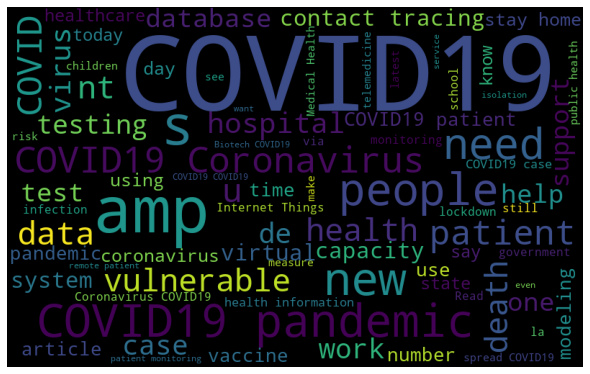

In [52]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
temp=' '.join(tweets_2['clean_tweet'].tolist())
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='black', 
                min_font_size = 10).generate(temp)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
def plot_topn(sentences, ngram_range=(1,3), top=20,firstword=''):
    c=CountVectorizer(ngram_range=ngram_range)
    X=c.fit_transform(sentences)
    words=pd.DataFrame(X.sum(axis=0),columns=c.get_feature_names()).T.sort_values(0,ascending=False).reset_index()
    res=words[words['index'].apply(lambda x: firstword in x)].head(top)
    pl=px.bar(res, x='index',y=0)
    pl.update_layout(yaxis_title='count',xaxis_title='Phrases')
    pl.show()

## UNIGRAM:

In [55]:
import plotly.express as px
fig = plot_topn(tweets_2['clean_tweet'], ngram_range=(1,1))

## BIGRAM:

In [56]:
plot_topn(tweets_2['clean_tweet'], ngram_range=(2,2))

## TRIGRAM:

In [57]:
plot_topn(tweets_2['clean_tweet'], ngram_range=(3,3))

In [328]:
df['date'] = pd.to_datetime(df['date'])

In [346]:
df['date'].iloc[0].month

8

In [362]:
month_mapping={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September'
              ,10:'October',11:'November',12:'December'}

In [365]:
df['Month']=df['Month'].map(month_mapping)

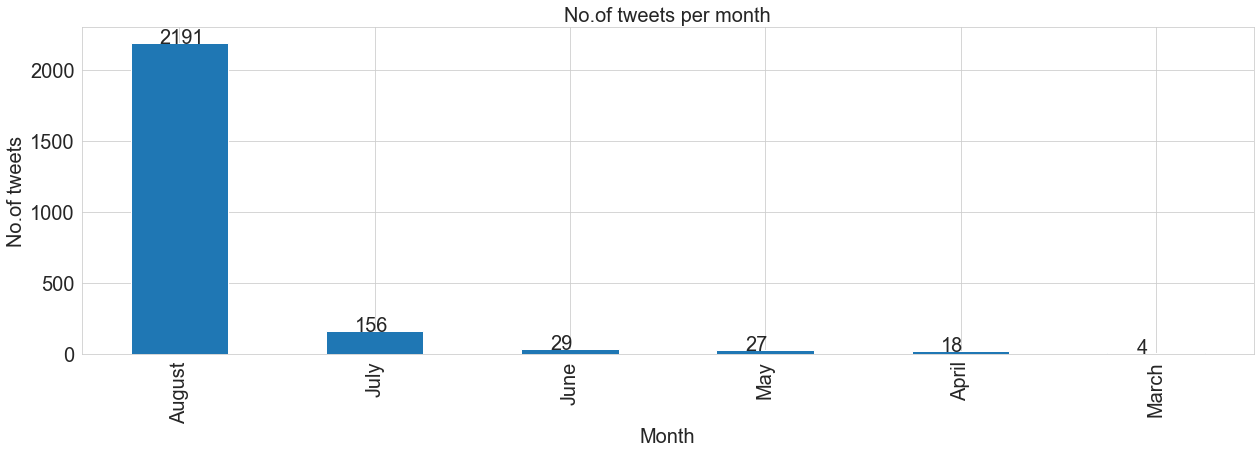

In [454]:
plt.figure(figsize=(21,6))
df['Month'].value_counts().plot(kind='bar')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
for i,j in enumerate(df['Month'].value_counts()):
    plt.text(i-0.1,j,str(j),fontsize=20)
plt.title("No.of tweets per month",fontsize=20)
plt.xlabel("Month",fontsize=20)
plt.ylabel("No.of tweets",fontsize=20)
plt.show()

## WEEK 2:

### Sai Ashwin:

In [70]:
len(df_keywords)

36

In [72]:
li=[]
for i in df_keywords:
    temp_df=pd.read_csv(i)
    li.append(temp_df)
total_tweets_data=pd.concat(li,axis=0)

In [74]:
total_tweets_data.shape

(1408, 36)

In [75]:
total_tweets_data.to_csv('all_tweets.csv')

In [3]:
df=pd.read_csv('all_tweets.csv')

In [4]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df['list_of_tweet']=df['tweet'].apply(lambda x:x.split())

In [6]:
li=[]
for i in df['list_of_tweet']:
    li.append(i)

In [7]:
from collections import Counter
cc=Counter()

In [8]:
import itertools
aaa = list(itertools.chain(*li))

In [9]:
cc=Counter(aaa)

In [10]:
ccc=pd.DataFrame(list(cc.items()),columns=['words','frequency'])

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

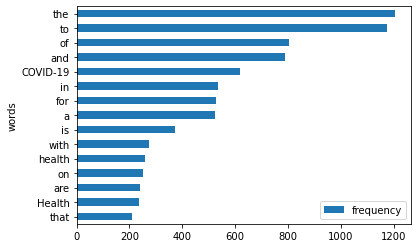

In [12]:
ccc.sort_values(by='frequency',ascending=True).tail(15).plot(kind='barh',x='words',y='frequency')

Regex to match the #string

In [13]:
import re

In [14]:
df['Hashtags']=df['tweet'].apply(lambda x : re.findall(r"#(\w+)",x))#to collect Hashtags words from the tweet

In [15]:
from ekphrasis.classes.segmenter import Segmenter
seg_tweets = Segmenter(corpus="Twitter")

Reading Twitter - 1grams ...
Reading Twitter - 2grams ...


C:\Users\Sai Thejaswin\anaconda3\lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [16]:
##seg_eng=Segmenter(corpus='English')

In [19]:
import preprocessor as p

# Below line is to remove the mentions and urls

In [20]:
df['Clean_text'] = df['tweet'].apply(lambda x :p.clean(x)) #to remove the Mentions and urls

NLTK(Natural Language tool Kit)  used for Tokenization,Removal of digits,Stop words and punctuations
.It is one of the best library to pre-process the text-data

In [21]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to C:\Users\Sai
[nltk_data]     Thejaswin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sai
[nltk_data]     Thejaswin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Below line is to remove the punctuations in the tweet

In [22]:
df['Clean_text']=df['Clean_text'].apply(lambda x : re.sub(r'[^\w\s]','',x))#This removes the ?,! and ,(punctuations) in the tweet

In [23]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()

In [24]:
def lemmatize_text(text):
    return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize(text)]

In [60]:
df['Clean_text'][0]

'Ive canceled this trip today due to but if not did want me to have a time machine nd leg is before the st Check your algorithms please'

In [25]:
df['Clean_text2']=df['Clean_text'].apply(lambda x:lemmatize_text(x))

In [26]:
stopwords=set(stopwords.words('english'))

In [27]:
df['Clean_text2']=df['Clean_text2'].apply(lambda x: [y for y in x if y not in stopwords])

# Removing stop-words using function
def remove_stopwords(text):
    for i in text:
        if i not in stopwords:
            return i
df['New_column']=df['Clean_text'].apply(lambda x : remove_stopwords(x))

In [28]:
def hashtagss(text):
    li=[]
    if (text!= []):
        for i in text:
            li.append(seg_tweets.segment(i))
        return li
    else:
        return li
            

In [29]:
df['List_Hastags']=df['Hashtags'].apply(lambda x: hashtagss(x))

In [30]:
from wordcloud import WordCloud

In [31]:
total_tweeet_wrd=list(itertools.chain(*df['Clean_text2']))

In [32]:
total_word_COunter = Counter(total_tweeet_wrd)

In [33]:
total_wprd_DataFrame=pd.DataFrame(total_word_COunter.most_common(30),columns=['word','Frequency'])

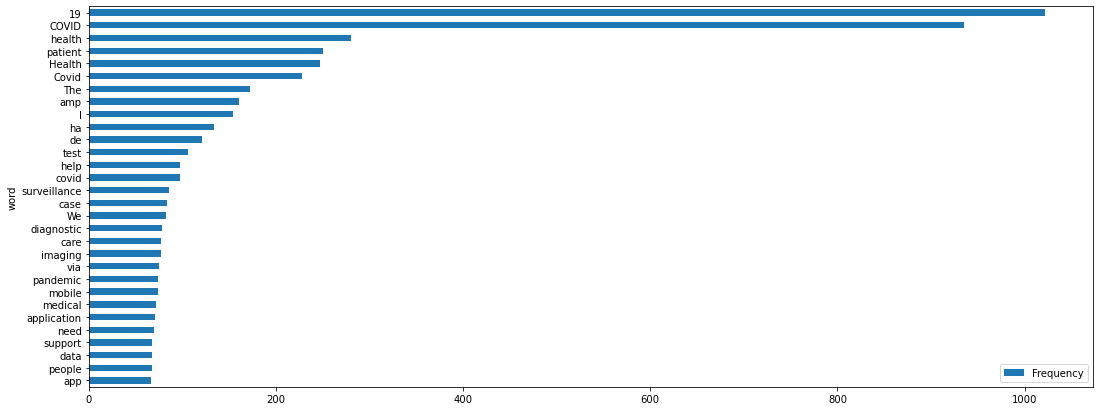

In [34]:
total_wprd_DataFrame.sort_values(by='Frequency',ascending=True).plot(kind='barh',x='word',y='Frequency',figsize=(18,7))

# Word-CLoud for all the words in the tweets

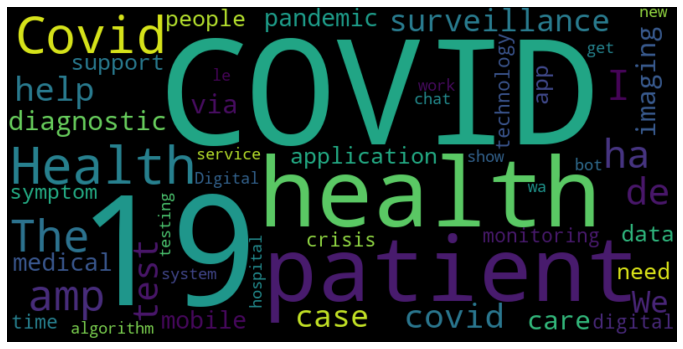

In [35]:
fdist = FreqDist(total_tweeet_wrd)
wc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [36]:
List_of_all_segmented_hastags=list(itertools.chain(*df['List_Hastags']))

# Word cloud for segmented Hashtags words

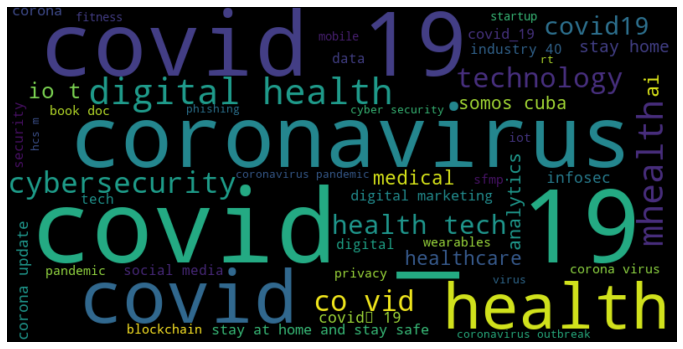

In [37]:
fdist = FreqDist(List_of_all_segmented_hastags)
wc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(fdist)
plt.figure(figsize=(12,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [38]:
Data_count=Counter(List_of_all_segmented_hastags)

In [39]:
Data_frame_most_occuring= pd.DataFrame(Data_count.most_common(20),columns=['words','frequencies'])

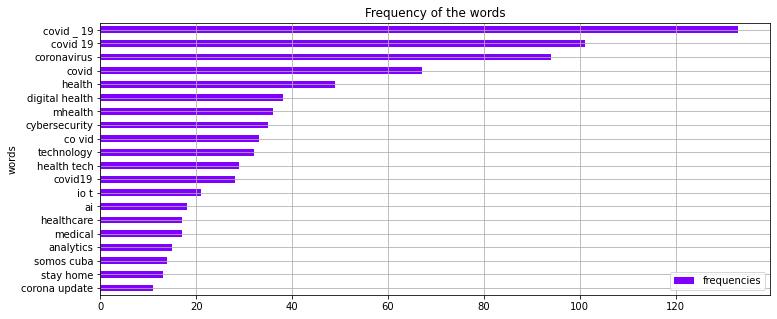

In [40]:
#plt.figure(figsize=(12,5))
Data_frame_most_occuring.sort_values(by='frequencies',ascending=True).plot(kind='barh',x='words',y='frequencies',figsize=(12,5),title='Frequency of the words',
                                                                          grid=True,colormap='rainbow')

Text(0.5, 1.0, 'No.of words in a tweet')

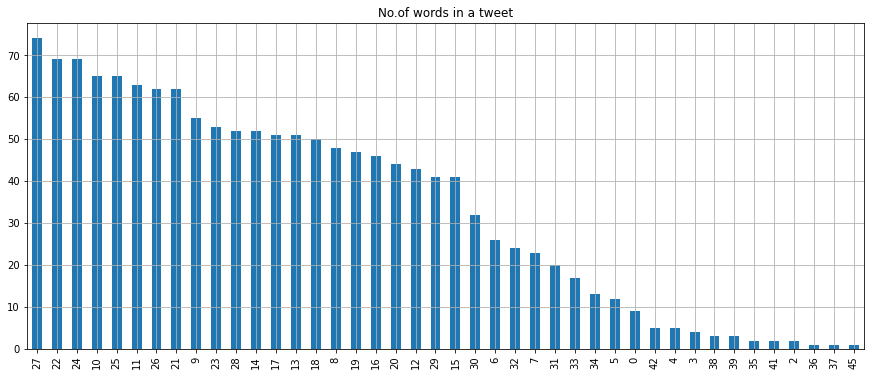

In [41]:
df['Clean_text2'].apply(len).value_counts().plot(kind='bar',figsize=(15,6),grid=True)
plt.title('No.of words in a tweet')

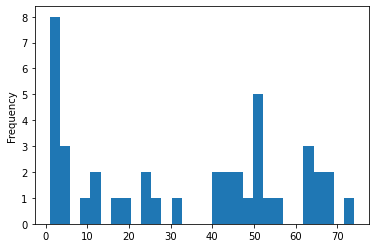

In [51]:
df['Clean_text2'].apply(len).value_counts().plot(kind='hist',bins=30)

<Figure size 432x288 with 0 Axes>

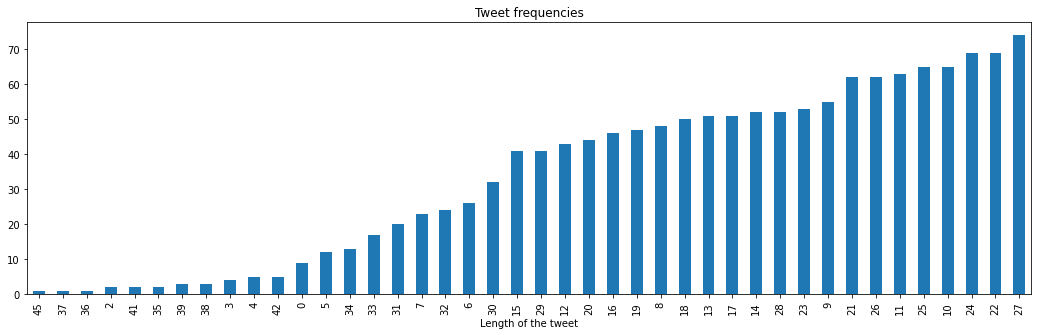

<Figure size 432x288 with 0 Axes>

In [59]:
df['Clean_text2'].apply(len).value_counts().sort_values().plot(kind='bar',figsize=(18,5))
plt.xlabel('Length of the tweet')
plt.title("Tweet frequencies")
plt.figure()

### k Means with BERT:

In [2]:
nouns_1 = pd.read_csv('E:/GSU/GRA-I/Data/nouns_phrases_1.csv')
nouns_2 = pd.read_csv('E:/GSU/GRA-I/Data/nouns_phrases_2.csv')
nouns_3 = pd.read_csv('E:/GSU/GRA-I/Data/nouns_phrases_3.csv')
nouns_4 = pd.read_csv('E:/GSU/GRA-I/Data/nouns_phrases_4.csv')
nouns_5 = pd.read_csv('E:/GSU/GRA-I/Data/nouns_phrases_5.csv')

In [3]:
nouns_1['nouns'] = nouns_1['nouns'].astype(str)
nouns_2['nouns'] = nouns_2['nouns'].astype(str)
nouns_3['nouns'] = nouns_3['nouns'].astype(str)
nouns_4['nouns'] = nouns_4['nouns'].astype(str)
nouns_5['nouns'] = nouns_5['nouns'].astype(str)

In [4]:
nouns_1['nouns_embed'] = nouns_1['nouns'].apply(lambda x : x.replace(' ', '_'))
nouns_2['nouns_embed'] = nouns_2['nouns'].apply(lambda x : x.replace(' ', '_'))
nouns_3['nouns_embed'] = nouns_3['nouns'].apply(lambda x : x.replace(' ', '_'))
nouns_4['nouns_embed'] = nouns_4['nouns'].apply(lambda x : x.replace(' ', '_'))
nouns_5['nouns_embed'] = nouns_5['nouns'].apply(lambda x : x.replace(' ', '_'))

In [5]:
nouns_1['tokenized'] = nouns_1.apply(lambda row: nltk.word_tokenize(row['nouns_embed']), axis=1)
nouns_2['tokenized'] = nouns_2.apply(lambda row: nltk.word_tokenize(row['nouns_embed']), axis=1)
nouns_3['tokenized'] = nouns_3.apply(lambda row: nltk.word_tokenize(row['nouns_embed']), axis=1)
nouns_4['tokenized'] = nouns_4.apply(lambda row: nltk.word_tokenize(row['nouns_embed']), axis=1)
nouns_5['tokenized'] = nouns_5.apply(lambda row: nltk.word_tokenize(row['nouns_embed']), axis=1)

<h2> Topic modeling: k-means with BERT </h2>

In [6]:
# Tokenize 
# Note using different NLTK tokenizer to keep contractions together
re_tokenizer = RegexpTokenizer("[\\w']+")

In [7]:
# Read in the sentence transformer model
embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [8]:
# Re-string (emails['body_cleaned']) because next steps require strings
nouns_1['tokenized_string'] = nouns_1['tokenized'].apply(lambda x: " ".join(x))
tweets_1 = nouns_1['tokenized_string'].values

In [9]:
nouns_2['tokenized_string'] = nouns_2['tokenized'].apply(lambda x: " ".join(x))
tweets_2 = nouns_2['tokenized_string'].values

In [10]:
nouns_3['tokenized_string'] = nouns_3['tokenized'].apply(lambda x: " ".join(x))
tweets_3 = nouns_3['tokenized_string'].values

In [11]:
nouns_4['tokenized_string'] = nouns_4['tokenized'].apply(lambda x: " ".join(x))
tweets_4 = nouns_4['tokenized_string'].values

In [12]:
nouns_5['tokenized_string'] = nouns_5['tokenized'].apply(lambda x: " ".join(x))
tweets_5 = nouns_5['tokenized_string'].values

In [13]:
# Encode the text with the sentence transformer model
encoded_data_1 = embedder.encode(tweets_1)
encoded_data_2 = embedder.encode(tweets_2)
encoded_data_3 = embedder.encode(tweets_3)
encoded_data_4 = embedder.encode(tweets_4)
encoded_data_5 = embedder.encode(tweets_5)

C:\Users\SuvaleenaPaul\anaconda3\lib\site-packages\transformers\tokenization_utils_base.py:2227: UserWarning: `max_length` is ignored when `padding`=`True`.
  warnings.warn("`max_length` is ignored when `padding`=`True`.")


In [14]:
# Create the k-means model and fit it to our text
km = KMeans(n_clusters = 5, random_state = 42) # Using 5 clusters here

In [15]:
# Define a function to return topic per document 
def doc_topic_id(all_training, km, num_clusters):
    clusters = km.labels_.tolist()
    docs = {'document_text':all_training, 'topic_id':clusters}
    frame = pd.DataFrame(docs, index = [clusters])
    for cluster in range(0, num_clusters):
        this_cluster_text = \
        frame[frame['topic_id'] == cluster]
        all_text = \
        " ".join(this_cluster_text['document_text'].astype(str))
    return frame

## Phase 1:

In [16]:
km.fit(encoded_data_1)

KMeans(n_clusters=5, random_state=42)

In [17]:
# Assign to a dataframe and add original index values from the emails dataframe
nouns_1['doc_id'] = nouns_1.index # Pull out index values into column

topics_bert_1 = doc_topic_id(tweets_1, km, 5) # Create dataframe
topics_bert_1 = topics_bert_1.set_index(nouns_1['doc_id']) # Assign doc_id from emails

In [18]:
# Group by topic and get most frequent 10 words per topic
topics_bert_grouped_1 = topics_bert_1.groupby(['topic_id'])['document_text'].apply(','.join).reset_index()
topics_bert_grouped_1['tokens'] = topics_bert_grouped_1['document_text'].apply(re_tokenizer.tokenize)

topics_bert_words_1 = []

for i in topics_bert_grouped_1['tokens']:
    counter = Counter(i)
    topics_bert_words_1.append(counter.most_common(10))

topics_bert_words_1 = pd.DataFrame(topics_bert_words_1)
topics_bert_words_1 = topics_bert_words_1.transpose()
topics_bert_words_1.columns = ['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']
topics_bert_words_1

topic_1             topic_2                      topic_3  \
0  (wearable_technology, 75)  (information, 167)                 (covid, 486)   
1             (internet, 64)            (ai, 72)                    (19, 374)   
2         (social_media, 38)           (icu, 60)               (covid19, 210)   
3                 (real, 33)         (learn, 57)               (covid_19, 22)   
4                    (_, 29)           (iot, 52)                (covidー19, 7)   
5              (youtube, 26)          (read, 49)                 (19_self, 7)   
6              (virtual, 25)        (please, 42)                  (triage, 6)   
7              (twitter, 23)          (iomt, 39)  (dashboard_tracks_covid, 6)   
8               (online, 22)    (electronic, 37)  (tencent_provides_covid, 5)   
9                  ('ve, 20)         (thank, 37)          (qt2020_covid19, 4)   

                topic_4             topic_5  
0              (t, 493)           (t, 3070)  
1             (co, 493)          (co, 3064)  
2  (remote_patient, 57)            (_, 222)  
3   (mental_health, 53)  (telemedicine, 40)  
4      (telehealth, 53)             (0, 32)  
5  (medical_things, 48)        (triage, 31)  
6   (public_health, 42)    (ありがとうございます, 24)  
7  (patient_portal, 40)    (視聴予約完了しました, 24)  
8      (healthcare, 26)          (3月3日, 24)  
9             (nhs, 26)             (火, 24)

## Phase 2:

In [19]:
km.fit(encoded_data_2)

KMeans(n_clusters=5, random_state=42)

In [20]:
# Assign to a dataframe and add original index values from the emails dataframe
nouns_2['doc_id'] = nouns_2.index # Pull out index values into column

topics_bert_2 = doc_topic_id(tweets_2, km, 5) # Create dataframe
topics_bert_2 = topics_bert_2.set_index(nouns_2['doc_id']) # Assign doc_id from emails

In [21]:
# Group by topic and get most frequent 10 words per topic
topics_bert_grouped_2 = topics_bert_2.groupby(['topic_id'])['document_text'].apply(','.join).reset_index()
topics_bert_grouped_2['tokens'] = topics_bert_grouped_2['document_text'].apply(re_tokenizer.tokenize)

topics_bert_words_2 = []

for i in topics_bert_grouped_2['tokens']:
    counter = Counter(i)
    topics_bert_words_2.append(counter.most_common(10))

topics_bert_words_2 = pd.DataFrame(topics_bert_words_2)
topics_bert_words_2 = topics_bert_words_2.transpose()
topics_bert_words_2.columns = ['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']
topics_bert_words_2

topic_1                   topic_2  \
0              (real, 63)                 (t, 2923)   
1        (monitoring, 25)                (co, 2920)   
2     (alberta_allow, 25)              (covid, 431)   
3            (record, 24)                 (19, 267)   
4         (real_time, 24)                  (_, 238)   
5            (thanks, 23)            (covid19, 157)   
6      (level_sensor, 21)  (policy_care_viagra, 49)   
7            (remote, 20)                   (1, 33)   
8              (find, 20)                   (0, 31)   
9  (interoperability, 19)                  (10, 30)   

                                             topic_3  \
0                                           (t, 141)   
1                                          (co, 140)   
2                                 (social_media, 54)   
3                                     (internet, 51)   
4  (iot_pharmaceutical_ai_biotech_covid19_coronav...   
5                      (artificial_intelligence, 31)   
6                       (syndromic_surveillance, 30)   
7                                      (virtual, 27)   
8                                         (real, 25)   
9                                          (web, 22)   

                              topic_4             topic_5  
0                           (co, 535)  (information, 126)  
1                            (t, 532)          (read, 68)  
2                (remote_patient, 68)            (ai, 67)  
3                 (mental_health, 64)         (learn, 66)  
4  (todaysmedicalupdate_medicine, 49)           (icu, 63)  
5                (medical_health, 49)         (trump, 53)  
6              (treatment_doctor, 49)           (iot, 52)  
7                 (public_health, 44)        (please, 50)  
8                    (telehealth, 29)          (join, 48)  
9                    (healthcare, 28)          (data, 36)

## Phase 3:

In [22]:
km.fit(encoded_data_3)

KMeans(n_clusters=5, random_state=42)

In [23]:
# Assign to a dataframe and add original index values from the emails dataframe
nouns_3['doc_id'] = nouns_3.index # Pull out index values into column

topics_bert_3 = doc_topic_id(tweets_3, km, 5) # Create dataframe
topics_bert_3 = topics_bert_3.set_index(nouns_3['doc_id']) # Assign doc_id from emails

In [24]:
# Group by topic and get most frequent 10 words per topic
topics_bert_grouped_3 = topics_bert_3.groupby(['topic_id'])['document_text'].apply(','.join).reset_index()
topics_bert_grouped_3['tokens'] = topics_bert_grouped_3['document_text'].apply(re_tokenizer.tokenize)

topics_bert_words_3 = []

for i in topics_bert_grouped_3['tokens']:
    counter = Counter(i)
    topics_bert_words_3.append(counter.most_common(10))

topics_bert_words_3 = pd.DataFrame(topics_bert_words_3)
topics_bert_words_3 = topics_bert_words_3.transpose()
topics_bert_words_3.columns = ['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']
topics_bert_words_3

topic_1  \
0                                       (t, 2940)   
1                                      (co, 2936)   
2                                    (covid, 310)   
3                                        (_, 233)   
4                                       (19, 192)   
5                                   (covid19, 93)   
6  (revenuecyclemanagement_hcmktg_hcsm_blog_, 24)   
7                              (telemedicine, 21)   
8                   (revenuecyclemanagement_, 18)   
9                                 (register_, 17)   

                                topic_2  \
0                               (_, 32)   
1                       (real_time, 20)   
2                           (watch, 19)   
3                            (real, 17)   
4                             ('ll, 16)   
5                            (time, 15)   
6  (exciting_articles_helpful_tips, 15)   
7                (cycle_management, 15)   
8                               (1, 14)   
9                  (iraqi_ministry, 14)   

                                    topic_3            topic_4  \
0                                 (co, 505)        (learn, 96)   
1                                  (t, 503)          (iot, 89)   
2                      (medical_things, 77)  (information, 79)   
3                      (remote_patient, 70)         (read, 73)   
4                       (mental_health, 62)        (visit, 64)   
5                   (health_technology, 32)         (iomt, 53)   
6                       (public_health, 26)        (april, 43)   
7  (business_growth_healthcare_vendors, 24)         (join, 40)   
8                          (telehealth, 22)          (icu, 38)   
9                          (healthcare, 22)           (uk, 36)   

                            topic_5  
0                         (ai, 129)  
1                          (t, 104)  
2                         (co, 103)  
3                    (internet, 87)  
4         (wearable_technology, 53)  
5     (artificial_intelligence, 35)  
6                     (youtube, 29)  
7                         (ibm, 27)  
8                     (virtual, 25)  
9  (strategy_vision_influencer, 24)

## Phase 4:

In [25]:
km.fit(encoded_data_4)

KMeans(n_clusters=5, random_state=42)

In [26]:
# Assign to a dataframe and add original index values from the emails dataframe
nouns_4['doc_id'] = nouns_4.index # Pull out index values into column

topics_bert_4 = doc_topic_id(tweets_4, km, 5) # Create dataframe
topics_bert_4 = topics_bert_4.set_index(nouns_4['doc_id']) # Assign doc_id from emails

In [27]:
# Group by topic and get most frequent 10 words per topic
topics_bert_grouped_4 = topics_bert_4.groupby(['topic_id'])['document_text'].apply(','.join).reset_index()
topics_bert_grouped_4['tokens'] = topics_bert_grouped_4['document_text'].apply(re_tokenizer.tokenize)

topics_bert_words_4 = []

for i in topics_bert_grouped_4['tokens']:
    counter = Counter(i)
    topics_bert_words_4.append(counter.most_common(10))

topics_bert_words_4 = pd.DataFrame(topics_bert_words_4)
topics_bert_words_4 = topics_bert_words_4.transpose()
topics_bert_words_4.columns = ['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']
topics_bert_words_4

topic_1        topic_2           topic_3  \
0                 (t, 394)      (t, 2006)        (read, 50)   
1                (co, 394)     (co, 2005)  (prevention, 23)   
2     (medical_things, 58)   (covid, 177)        (find, 22)   
3      (mental_health, 40)       (_, 175)       (thank, 16)   
4      (public_health, 36)       (19, 97)      (thanks, 15)   
5     (remote_patient, 29)  (covid19, 38)        (care, 13)   
6  (health_technology, 28)        (5, 15)       (visit, 13)   
7  (physician_burnout, 27)       (29, 13)      (remote, 13)   
8                (cdc, 25)  (2021_23, 13)       (watch, 12)   
9                  (_, 24)        (2, 12)         (top, 12)   

             topic_4                        topic_5  
0  (information, 75)                 (internet, 70)  
1        (learn, 70)      (wearable_technology, 57)  
2           (ai, 69)             (social_media, 44)  
3         (iomt, 48)                       (co, 41)  
4          (icu, 48)                        (t, 40)  
5          (iot, 43)          (virtual_scribes, 38)  
6         (june, 33)  (artificial_intelligence, 32)  
7          (may, 32)              (dynamic_duo, 26)  
8   (electronic, 29)           (unknown_wallet, 23)  
9         (july, 28)                       (pc, 20)

## Phase 5:

In [28]:
km.fit(encoded_data_5)

KMeans(n_clusters=5, random_state=42)

In [29]:
# Assign to a dataframe and add original index values from the emails dataframe
nouns_5['doc_id'] = nouns_5.index # Pull out index values into column

topics_bert_5 = doc_topic_id(tweets_5, km, 5) # Create dataframe
topics_bert_5 = topics_bert_5.set_index(nouns_5['doc_id']) # Assign doc_id from emails

In [30]:
# Group by topic and get most frequent 10 words per topic
topics_bert_grouped_5 = topics_bert_5.groupby(['topic_id'])['document_text'].apply(','.join).reset_index()
topics_bert_grouped_5['tokens'] = topics_bert_grouped_5['document_text'].apply(re_tokenizer.tokenize)

topics_bert_words_5 = []

for i in topics_bert_grouped_5['tokens']:
    counter = Counter(i)
    topics_bert_words_5.append(counter.most_common(10))

topics_bert_words_5 = pd.DataFrame(topics_bert_words_5)
topics_bert_words_5 = topics_bert_words_5.transpose()
topics_bert_words_5.columns = ['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']
topics_bert_words_5

topic_1                   topic_2       topic_3  \
0           (ai, 127)                 (co, 827)    (read, 69)   
1           (iot, 98)                  (t, 826)   (learn, 63)   
2    (electronic, 53)  (medical_technology, 92)  (thanks, 36)   
3       (digital, 47)   (health_technology, 51)   (thank, 35)   
4   (information, 47)                   (_, 37)   (visit, 34)   
5            (rt, 41)      (medical_things, 37)    (care, 33)   
6  (telemedicine, 41)       (mental_health, 36)    (well, 33)   
7           (ehr, 40)      (patient_portal, 36)  (record, 28)   
8             (s, 39)                 (nhs, 31)    (find, 26)   
9    (population, 39)          (healthcare, 31)    (real, 22)   

                 topic_4                        topic_5  
0              (t, 3771)                 (internet, 96)  
1             (co, 3770)                  (virtual, 68)  
2               (_, 367)                       (co, 47)  
3               (0, 124)                        (t, 46)  
4            (0_前日比, 96)      (wearable_technology, 42)  
5           (rtされた数, 44)                (analytics, 39)  
6              (前日比, 44)             (social_media, 38)  
7     (0_受け取ったリプライ数, 44)  (artificial_intelligence, 36)  
8  (r_eicu_フォローされた数, 41)         (cycle_management, 35)  
9        (0_いいねされた数, 40)                  (twitter, 30)

### Dynamic BERT:

In [ ]:
# Extract direct tweets

tweets_1 = pd.read_csv('/content/tweets_1.csv')
tweets_2 = pd.read_csv('/content/tweets_2.csv')
tweets_3 = pd.read_csv('/content/tweets_3.csv')
tweets_4 = pd.read_csv('/content/tweets_4.csv')
tweets_5 = pd.read_csv('/content/tweets_5.csv')

In [ ]:
tweets_1

In [ ]:
import gensim
from gensim.utils import simple_preprocess

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [ ]:
final_tweets_1 = tweets_1['punctuations_removed'].values.tolist()
final_tweets_2 = tweets_2['punctuations_removed'].values.tolist()
final_tweets_3 = tweets_3['punctuations_removed'].values.tolist()
final_tweets_4 = tweets_4['punctuations_removed'].values.tolist()
final_tweets_5 = tweets_5['punctuations_removed'].values.tolist()

In [ ]:
data_words_1 = list(sent_to_words(final_tweets_1))
data_words_2 = list(sent_to_words(final_tweets_2))
data_words_3 = list(sent_to_words(final_tweets_3))
data_words_4 = list(sent_to_words(final_tweets_4))
data_words_5 = list(sent_to_words(final_tweets_5))

In [ ]:
data_words_1[0]

In [ ]:
#Remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
stop = stopwords.words('english')
stop.extend(['health', 'patients', 'patient', 'risk', 'co', 'new', 'use', 'using', 'virtual','last', 'see', 'care', 'am', 'wrong','twitter','get', 'like','need','would','see','want', 'data','post','iot','via'])

def remove_sw(mylist):
  cleanword_list=[]
  for element in mylist:
    no_stopwords = [w for w in element if not w in stop]
    cleanword_list.append(no_stopwords)
  return(cleanword_list)

In [ ]:
data_words_1=remove_sw(data_words_1)
data_words_2=remove_sw(data_words_2)
data_words_3=remove_sw(data_words_3)
data_words_4=remove_sw(data_words_4)
data_words_5=remove_sw(data_words_5)

In [ ]:
bigram_1 = gensim.models.Phrases(data_words_1, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod_1 = gensim.models.phrases.Phraser(bigram_1)

In [ ]:
bigram_2 = gensim.models.Phrases(data_words_2, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod_2 = gensim.models.phrases.Phraser(bigram_2)

In [ ]:
bigram_3 = gensim.models.Phrases(data_words_3, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod_3 = gensim.models.phrases.Phraser(bigram_3)

In [ ]:
bigram_4 = gensim.models.Phrases(data_words_4, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod_4 = gensim.models.phrases.Phraser(bigram_4)

In [ ]:
bigram_5 = gensim.models.Phrases(data_words_5, min_count=5, threshold=100) # higher threshold fewer phrases.
bigram_mod_5 = gensim.models.phrases.Phraser(bigram_5)

In [ ]:
def make_bigrams_1(texts):
    return [bigram_mod_1[doc] for doc in texts]

In [ ]:
  
def make_bigrams_2(texts):
    return [bigram_mod_2[doc] for doc in texts]

In [ ]:
def make_bigrams_3(texts):
    return [bigram_mod_3[doc] for doc in texts]

In [ ]:
def make_bigrams_4(texts):
    return [bigram_mod_4[doc] for doc in texts]

In [ ]:
def make_bigrams_5(texts):
    return [bigram_mod_5[doc] for doc in texts]

In [ ]:
tweet_bigrams_1 = make_bigrams_1(data_words_1)
tweet_bigrams_2 = make_bigrams_2(data_words_2)
tweet_bigrams_3 = make_bigrams_3(data_words_3)
tweet_bigrams_4 = make_bigrams_4(data_words_4)
tweet_bigrams_5 = make_bigrams_5(data_words_5)    #Bigrams created here

In [ ]:
import gensim.corpora as corpora

In [ ]:
id2word_1 = corpora.Dictionary(tweet_bigrams_1)
id2word_2 = corpora.Dictionary(tweet_bigrams_2)
id2word_3 = corpora.Dictionary(tweet_bigrams_3)
id2word_4 = corpora.Dictionary(tweet_bigrams_4)
id2word_5 = corpora.Dictionary(tweet_bigrams_5)

In [ ]:
text_1 = tweet_bigrams_1
text_2 = tweet_bigrams_2
text_3 = tweet_bigrams_3
text_4 = tweet_bigrams_4
text_5 = tweet_bigrams_5

In [ ]:
corpus_1t = [id2word_1.doc2bow(text) for text in text_1]
corpus_2t = [id2word_2.doc2bow(text) for text in text_2]
corpus_3t = [id2word_3.doc2bow(text) for text in text_3]
corpus_4t = [id2word_4.doc2bow(text) for text in text_4]
corpus_5t = [id2word_5.doc2bow(text) for text in text_5]

In [ ]:
print(corpus_1t[:7])

# Coherence Score

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        #model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model=gensim.models.LdaModel(corpus=corpus,
                                       dictionary=dictionary,
                                       num_topics=num_topics, 
                                       random_state=100,
                                       chunksize=500,
                                       passes=10,
                                       per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(dictionary=dictionary, corpus=corpus, texts=texts, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

### Topic Modelling - k Means with BERT:

In [2]:
phase_1 = pd.read_csv(r'C:\Users\14708\Desktop\New folder\tweets_1.csv')
phase_2 = pd.read_csv(r'C:\Users\14708\Desktop\New folder\tweets_2.csv')
phase_3 = pd.read_csv(r'C:\Users\14708\Desktop\New folder\tweets_3.csv')

In [3]:
tweets_1 = phase_1[['tweet']]
tweets_2 = phase_2[['tweet']]
tweets_3 = phase_3[['tweet']]

In [4]:
tweets_1['tweet'] = tweets_1['tweet'].astype(str)
tweets_1['tweet'] = tweets_1['tweet'].map(lambda x: re.sub('[,()#:\.!?@/]', '', x))
tweets_1['tweet'] = tweets_1['tweet'].map(lambda x:x.lower())
tweets_1['tweet'] = tweets_1['tweet'].map(lambda x:re.sub('[0-9\n]','',x))
tweets_1['tweet'] = tweets_1['tweet'].map(lambda x:re.sub( '[^a-z0-9]', ' ', x))
tweets_1

<ipython-input-4-4c07039dd817>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_1['tweet'] = tweets_1['tweet'].astype(str)
<ipython-input-4-4c07039dd817>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_1['tweet'] = tweets_1['tweet'].map(lambda x: re.sub('[,()#:\.!?@/]', '', x))
<ipython-input-4-4c07039dd817>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

tweet
0     markov chain algorithm to delete this sheet yo...
1     brenctzen everytime i post a video it literall...
2     hasanshahbaz twitter needs a better sign up al...
3      moscow liga recap     u      player of the da...
4     i watch like one mde vid a year and it fucks u...
...                                                 ...
6694  verifying validating the clinical usefulness o...
6695  today may   pm et sciartexchange facebook lear...
6696  follow us on linkedin  httpstcoofvymajsym wear...
6697  asu opened the weartech center a first of its ...
6698                                                nan

[6699 rows x 1 columns]

In [5]:
tweets_2['tweet'] = tweets_2['tweet'].astype(str)
tweets_2['tweet'] = tweets_2['tweet'].map(lambda x: re.sub('[,()#:\.!?@/]', '', x))
tweets_2['tweet'] = tweets_2['tweet'].map(lambda x:x.lower())
tweets_2['tweet'] = tweets_2['tweet'].map(lambda x:re.sub('[0-9\n]','',x))
tweets_2['tweet'] = tweets_2['tweet'].map(lambda x:re.sub( '[^a-z0-9]', ' ', x))
tweets_2

<ipython-input-5-8cff7519b286>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2['tweet'] = tweets_2['tweet'].astype(str)
<ipython-input-5-8cff7519b286>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2['tweet'] = tweets_2['tweet'].map(lambda x: re.sub('[,()#:\.!?@/]', '', x))
<ipython-input-5-8cff7519b286>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

tweet
0     geoffcmason greencpa lisaformaine strategema w...
1     a late night one  at least the user im still f...
2     with many federal employees working from home ...
3      itox will run over   imo  ai iiot cybersecuri...
4     twitter is letting people threaten joe biden s...
...                                                 ...
6918  fahrni windows on the desktop ios on mobile i ...
6919  i made a web based particle emitter well a pag...
6920  tour builder is a web based tool for storytell...
6921  pandemic or not technology impacts the way we ...
6922                                                nan

[6923 rows x 1 columns]

In [6]:
tweets_3['tweet'] = tweets_3['tweet'].astype(str)
tweets_3['tweet'] = tweets_3['tweet'].map(lambda x: re.sub('[,()#:\.!?@/]', '', x))
tweets_3['tweet'] = tweets_3['tweet'].map(lambda x:x.lower())
tweets_3['tweet'] = tweets_3['tweet'].map(lambda x:re.sub('[0-9\n]','',x))
tweets_3['tweet'] = tweets_3['tweet'].map(lambda x:re.sub( '[^a-z0-9]', ' ', x))
tweets_3

<ipython-input-6-75104e653128>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_3['tweet'] = tweets_3['tweet'].astype(str)
<ipython-input-6-75104e653128>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_3['tweet'] = tweets_3['tweet'].map(lambda x: re.sub('[,()#:\.!?@/]', '', x))
<ipython-input-6-75104e653128>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

tweet
0     hashgraphguide hedera  to this effect we emplo...
1     threddyrex as a dyed in the wool c programmer ...
2     linorulli catholicguyshow it s because they su...
3     itssan just to let everyone know that dislikin...
4     i looked up online therapy one time and i m no...
...                                                 ...
6142  with the smart sensor platform   and the intui...
6143  with covid  completely shifting the education ...
6144  still using paper or spreadsheets for your clu...
6145  sariazout muting newsletters ignoring most pod...
6146                                                nan

[6147 rows x 1 columns]

In [7]:
tweets_1['tokenized_tweet'] = tweets_1.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
stop_1 = set(stopwords.words('english'))
tweets_1['stopwords_removed'] = tweets_1['tokenized_tweet'].apply(lambda y: [item.lower() for item in y if item.lower() not in stop_1])
punc = string.punctuation
tweets_1['punctuations_removed'] = tweets_1['stopwords_removed'].apply(lambda x: [word for word in x if word not in punc])
digits = string.digits
tweets_1['punctuations_removed'] = tweets_1['punctuations_removed'].apply(lambda x: [word for word in x if word not in digits])
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tweets_1 ['Lemmatized_tweets']=''
for i in range(0,len(tweets_1)):
    tweets_1['Lemmatized_tweets'].iloc[i]=[lemmatizer.lemmatize(x) for x in tweets_1['punctuations_removed'].iloc[i]]
nouns = []
tweets_1 ['Noun_Extracted_tweets']=''
for i in range (len(tweets_1['Lemmatized_tweets'])):
    for (word, pos) in nltk.pos_tag(tweets_1['Lemmatized_tweets'].iloc[i]):
        if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'):
            nouns.append(word)
    tweets_1['Noun_Extracted_tweets'].iloc[i] = nouns
    nouns = []
    
tweets_1

<ipython-input-7-9f33a60559d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_1['tokenized_tweet'] = tweets_1.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
<ipython-input-7-9f33a60559d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_1['stopwords_removed'] = tweets_1['tokenized_tweet'].apply(lambda y: [item.lower() for item in y if item.lower() not in stop_1])
<ipython-input-7-9f33a60559d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

tweet  \
0     markov chain algorithm to delete this sheet yo...   
1     brenctzen everytime i post a video it literall...   
2     hasanshahbaz twitter needs a better sign up al...   
3      moscow liga recap     u      player of the da...   
4     i watch like one mde vid a year and it fucks u...   
...                                                 ...   
6694  verifying validating the clinical usefulness o...   
6695  today may   pm et sciartexchange facebook lear...   
6696  follow us on linkedin  httpstcoofvymajsym wear...   
6697  asu opened the weartech center a first of its ...   
6698                                                nan   

                                        tokenized_tweet  \
0     [markov, chain, algorithm, to, delete, this, s...   
1     [brenctzen, everytime, i, post, a, video, it, ...   
2     [hasanshahbaz, twitter, needs, a, better, sign...   
3     [moscow, liga, recap, u, player, of, the, day,...   
4     [i, watch, like, one, mde, vid, a, year, and, ...   
...                                                 ...   
6694  [verifying, validating, the, clinical, usefuln...   
6695  [today, may, pm, et, sciartexchange, facebook,...   
6696  [follow, us, on, linkedin, httpstcoofvymajsym,...   
6697  [asu, opened, the, weartech, center, a, first,...   
6698                                              [nan]   

                                      stopwords_removed  \
0     [markov, chain, algorithm, delete, sheet, may,...   
1     [brenctzen, everytime, post, video, literally,...   
2     [hasanshahbaz, twitter, needs, better, sign, a...   
3     [moscow, liga, recap, u, player, day, menshiko...   
4     [watch, like, one, mde, vid, year, fucks, yout...   
...                                                 ...   
6694  [verifying, validating, clinical, usefulness, ...   
6695  [today, may, pm, et, sciartexchange, facebook,...   
6696  [follow, us, linkedin, httpstcoofvymajsym, wea...   
6697  [asu, opened, weartech, center, first, kind, w...   
6698                                              [nan]   

                                   punctuations_removed  \
0     [markov, chain, algorithm, delete, sheet, may,...   
1     [brenctzen, everytime, post, video, literally,...   
2     [hasanshahbaz, twitter, needs, better, sign, a...   
3     [moscow, liga, recap, u, player, day, menshiko...   
4     [watch, like, one, mde, vid, year, fucks, yout...   
...                                                 ...   
6694  [verifying, validating, clinical, usefulness, ...   
6695  [today, may, pm, et, sciartexchange, facebook,...   
6696  [follow, us, linkedin, httpstcoofvymajsym, wea...   
6697  [asu, opened, weartech, center, first, kind, w...   
6698                                              [nan]   

                                      Lemmatized_tweets  \
0     [markov, chain, algorithm, delete, sheet, may,...   
1     [brenctzen, everytime, post, video, literally,...   
2     [hasanshahbaz, twitter, need, better, sign, al...   
3     [moscow, liga, recap, u, player, day, menshiko...   
4     [watch, like, one, mde, vid, year, fuck, youtu...   
...                                                 ...   
6694  [verifying, validating, clinical, usefulness, ...   
6695  [today, may, pm, et, sciartexchange, facebook,...   
6696  [follow, u, linkedin, httpstcoofvymajsym, wear...   
6697  [asu, opened, weartech, center, first, kind, w...   
6698                                              [nan]   

                                  Noun_Extracted_tweets  
0     [markov, chain, sheet, generate, text, generat...  
1             [everytime, post, video, algorithm, lmao]  
2     [hasanshahbaz, twitter, sign, ban, people, acc...  
3     [moscow, liga, recap, player, day, mention, sk...  
4                             [watch, mde, year, month]  
...                                                 ...  
6694    [technology, httpstcofypewuizg, theofficialacm]  
6695  [today, sciartexchange, facebook, l

In [8]:
tweets_2['tokenized_tweet'] = tweets_2.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
stop_2 = set(stopwords.words('english'))
tweets_2['stopwords_removed'] = tweets_2['tokenized_tweet'].apply(lambda y: [item.lower() for item in y if item.lower() not in stop_2])
punc = string.punctuation
tweets_2['punctuations_removed'] = tweets_2['stopwords_removed'].apply(lambda x: [word for word in x if word not in punc])
digits = string.digits
tweets_2['punctuations_removed'] = tweets_2['punctuations_removed'].apply(lambda x: [word for word in x if word not in digits])
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tweets_2 ['Lemmatized_tweets']=''
for i in range(0,len(tweets_2)):
    tweets_2['Lemmatized_tweets'].iloc[i]=[lemmatizer.lemmatize(x) for x in tweets_2['punctuations_removed'].iloc[i]]
nouns = []
tweets_2 ['Noun_Extracted_tweets']=''
for i in range (len(tweets_2['Lemmatized_tweets'])):
    for (word, pos) in nltk.pos_tag(tweets_2['Lemmatized_tweets'].iloc[i]):
        if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'):
            nouns.append(word)
    tweets_2['Noun_Extracted_tweets'].iloc[i] = nouns
    nouns = []

tweets_2

<ipython-input-8-5365e2d2b515>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2['tokenized_tweet'] = tweets_2.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
<ipython-input-8-5365e2d2b515>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2['stopwords_removed'] = tweets_2['tokenized_tweet'].apply(lambda y: [item.lower() for item in y if item.lower() not in stop_2])
<ipython-input-8-5365e2d2b515>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

tweet  \
0     geoffcmason greencpa lisaformaine strategema w...   
1     a late night one  at least the user im still f...   
2     with many federal employees working from home ...   
3      itox will run over   imo  ai iiot cybersecuri...   
4     twitter is letting people threaten joe biden s...   
...                                                 ...   
6918  fahrni windows on the desktop ios on mobile i ...   
6919  i made a web based particle emitter well a pag...   
6920  tour builder is a web based tool for storytell...   
6921  pandemic or not technology impacts the way we ...   
6922                                                nan   

                                        tokenized_tweet  \
0     [geoffcmason, greencpa, lisaformaine, stratege...   
1     [a, late, night, one, at, least, the, user, im...   
2     [with, many, federal, employees, working, from...   
3     [itox, will, run, over, imo, ai, iiot, cyberse...   
4     [twitter, is, letting, people, threaten, joe, ...   
...                                                 ...   
6918  [fahrni, windows, on, the, desktop, ios, on, m...   
6919  [i, made, a, web, based, particle, emitter, we...   
6920  [tour, builder, is, a, web, based, tool, for, ...   
6921  [pandemic, or, not, technology, impacts, the, ...   
6922                                              [nan]   

                                      stopwords_removed  \
0     [geoffcmason, greencpa, lisaformaine, stratege...   
1     [late, night, one, least, user, im, still, fig...   
2     [many, federal, employees, working, home, cybe...   
3     [itox, run, imo, ai, iiot, cybersecurity, bloc...   
4     [twitter, letting, people, threaten, joe, bide...   
...                                                 ...   
6918  [fahrni, windows, desktop, ios, mobile, happy,...   
6919  [made, web, based, particle, emitter, well, pa...   
6920  [tour, builder, web, based, tool, storytelling...   
6921  [pandemic, technology, impacts, way, interact,...   
6922                                              [nan]   

                                   punctuations_removed  \
0     [geoffcmason, greencpa, lisaformaine, stratege...   
1     [late, night, one, least, user, im, still, fig...   
2     [many, federal, employees, working, home, cybe...   
3     [itox, run, imo, ai, iiot, cybersecurity, bloc...   
4     [twitter, letting, people, threaten, joe, bide...   
...                                                 ...   
6918  [fahrni, windows, desktop, ios, mobile, happy,...   
6919  [made, web, based, particle, emitter, well, pa...   
6920  [tour, builder, web, based, tool, storytelling...   
6921  [pandemic, technology, impacts, way, interact,...   
6922                                              [nan]   

                                      Lemmatized_tweets  \
0     [geoffcmason, greencpa, lisaformaine, stratege...   
1     [late, night, one, least, user, im, still, fig...   
2     [many, federal, employee, working, home, cyber...   
3     [itox, run, imo, ai, iiot, cybersecurity, bloc...   
4     [twitter, letting, people, threaten, joe, bide...   
...                                                 ...   
6918  [fahrni, window, desktop, io, mobile, happy, f...   
6919  [made, web, based, particle, emitter, well, pa...   
6920  [tour, builder, web, based, tool, storytelling...   
6921  [pandemic, technology, impact, way, interact, ...   
6922                                              [nan]   

                                  Noun_Extracted_tweets  
0     [geoffcmason, greencpa, lisaformaine, stratege...  
1     [night, user, im, root, pwn, htb, cybersecurit...  
2     [employee, home, cybersecurity, look, beef, de...  
3     [itox, imo, ai, iiot, cybersecurity, marketing...  
4     [twitter, people, cybersecurity, expert, smart...  
...                                                 ...  
6918  [fahrni, window, desktop, io, mobile, web, agg...  
6919  [web, particle, get, effect, stream

In [9]:
tweets_3['tokenized_tweet'] = tweets_3.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
stop_3 = set(stopwords.words('english'))
tweets_3['stopwords_removed'] = tweets_3['tokenized_tweet'].apply(lambda y: [item.lower() for item in y if item.lower() not in stop_3])
punc = string.punctuation
tweets_3['punctuations_removed'] = tweets_3['stopwords_removed'].apply(lambda x: [word for word in x if word not in punc])
digits = string.digits
tweets_3['punctuations_removed'] = tweets_3['punctuations_removed'].apply(lambda x: [word for word in x if word not in digits])
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
tweets_3 ['Lemmatized_tweets']=''
for i in range(0,len(tweets_3)):
    tweets_3['Lemmatized_tweets'].iloc[i]=[lemmatizer.lemmatize(x) for x in tweets_3['punctuations_removed'].iloc[i]]
nouns = []
tweets_3 ['Noun_Extracted_tweets']=''
for i in range (len(tweets_3['Lemmatized_tweets'])):
    for (word, pos) in nltk.pos_tag(tweets_3['Lemmatized_tweets'].iloc[i]):
        if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS'):
            nouns.append(word)
    tweets_3['Noun_Extracted_tweets'].iloc[i] = nouns
    nouns = []   
    
tweets_3

<ipython-input-9-7554da8ad8d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_3['tokenized_tweet'] = tweets_3.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
<ipython-input-9-7554da8ad8d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_3['stopwords_removed'] = tweets_3['tokenized_tweet'].apply(lambda y: [item.lower() for item in y if item.lower() not in stop_3])
<ipython-input-9-7554da8ad8d7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

tweet  \
0     hashgraphguide hedera  to this effect we emplo...   
1     threddyrex as a dyed in the wool c programmer ...   
2     linorulli catholicguyshow it s because they su...   
3     itssan just to let everyone know that dislikin...   
4     i looked up online therapy one time and i m no...   
...                                                 ...   
6142  with the smart sensor platform   and the intui...   
6143  with covid  completely shifting the education ...   
6144  still using paper or spreadsheets for your clu...   
6145  sariazout muting newsletters ignoring most pod...   
6146                                                nan   

                                        tokenized_tweet  \
0     [hashgraphguide, hedera, to, this, effect, we,...   
1     [threddyrex, as, a, dyed, in, the, wool, c, pr...   
2     [linorulli, catholicguyshow, it, s, because, t...   
3     [itssan, just, to, let, everyone, know, that, ...   
4     [i, looked, up, online, therapy, one, time, an...   
...                                                 ...   
6142  [with, the, smart, sensor, platform, and, the,...   
6143  [with, covid, completely, shifting, the, educa...   
6144  [still, using, paper, or, spreadsheets, for, y...   
6145  [sariazout, muting, newsletters, ignoring, mos...   
6146                                              [nan]   

                                      stopwords_removed  \
0     [hashgraphguide, hedera, effect, employ, speci...   
1     [threddyrex, dyed, wool, c, programmer, writte...   
2     [linorulli, catholicguyshow, surveyed, kyle, d...   
3     [itssan, let, everyone, know, disliking, video...   
4     [looked, online, therapy, one, time, sure, ads...   
...                                                 ...   
6142  [smart, sensor, platform, intuitive, web, base...   
6143  [covid, completely, shifting, education, indus...   
6144  [still, using, paper, spreadsheets, club, char...   
6145  [sariazout, muting, newsletters, ignoring, pod...   
6146                                              [nan]   

                                   punctuations_removed  \
0     [hashgraphguide, hedera, effect, employ, speci...   
1     [threddyrex, dyed, wool, c, programmer, writte...   
2     [linorulli, catholicguyshow, surveyed, kyle, d...   
3     [itssan, let, everyone, know, disliking, video...   
4     [looked, online, therapy, one, time, sure, ads...   
...                                                 ...   
6142  [smart, sensor, platform, intuitive, web, base...   
6143  [covid, completely, shifting, education, indus...   
6144  [still, using, paper, spreadsheets, club, char...   
6145  [sariazout, muting, newsletters, ignoring, pod...   
6146                                              [nan]   

                                      Lemmatized_tweets  \
0     [hashgraphguide, hedera, effect, employ, speci...   
1     [threddyrex, dyed, wool, c, programmer, writte...   
2     [linorulli, catholicguyshow, surveyed, kyle, d...   
3     [itssan, let, everyone, know, disliking, video...   
4     [looked, online, therapy, one, time, sure, ad,...   
...                                                 ...   
6142  [smart, sensor, platform, intuitive, web, base...   
6143  [covid, completely, shifting, education, indus...   
6144  [still, using, paper, spreadsheet, club, chari...   
6145  [sariazout, muting, newsletter, ignoring, podc...   
6146                                              [nan]   

                                  Noun_Extracted_tweets  
0     [hashgraphguide, hedera, effect, type, paralle...  
1     [threddyrex, programmer, replacement, algorith...  
2         [linorulli, catholicguyshow, doug, algorithm]  
3                                            [everyone]  
4        [online, therapy, time, ad, sign, help, thing]  
...                                                 ...  
6142  [sensor, platform, web, get, capability, phase...  
6143  [covid, education, industry, format

In [10]:
add_stopwords1 = {"help", "year", "hit", "better", "week", "est", "et", "way", "even", "modeling", "real", "could", "well",
"community", "never", "great", "diagnostic", "dans", "much", "today", "many", "capacity", "analytics", "home", "feel", "thank", 
"high", "support", "mhealth", "httpstcolycabrr", "best", "rt", "management", "still", "pra", "coronavirus", "hello","record",
"le", "que", "medical", "surveillance", "el", "online", "eicu", "digital", "test", "digital", "work", "good", "'s", "=01", 
"ect" , "''" , "``" , "subject" , "enron" , "http" , "cc", "=20" , "e" , "risk", "improve", "learn", "flow", "going", "algorithm",
"3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=", "mais", "think", "mohealth", "public",
"=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d", "10" , "=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=",
"'ll" , "ees" , "'d" , "dbcaps97data" , "'m" , "2/2/2002" , "nd=0604" , "j" , "fw", "pandemic", "check",
"st" , "06/30/2000" , "2/1/2002" , "fri" , "ct" , "l" , "'ve" , "ena" , "inc." , "pt",
"..." , "=09" , "imceanotes-erin+20richardson+20+3cerichardson+40sarofim+2ecom+3e+40e" ,
"steffes/na/enron" , "steffes/na/enron" , "st." , "eb" , "pm" , "n't" , "2a04" , "2001" , "enron.com"
'delete','sheet','may','want','//t.co/v46WvaClFC','Te_Papa','desbfit','abc13houston','Fitbit','//t.co/6HosrKWVRa','WHEW','carmodel','feminists','MnDPS_MSP','CAEHomelessness',
'//t.co/mBmBkmJaiR','//t.co/bruuMFwcOD','Bij','JamesWallmeup','دعم','//t.co/YtcnYfoUyL','iBox','payer','DoingMore4OC','NAF','NCAA','.com','WHODjibouti',
'//t.co/qMjvuQffuM','1_brainyyy','⭕️Take','//t.co/aaF71PHv3X','8500','yoyoel','ノ','hoshinoona','aliens','EPAL','//t.co/SCNEnb6iV7','Une','//t.co/6DRmyhYSOg',
'301-600-1506.','MrDtAFC','//t.co/zCZug3MQlN','//t.co/dKbxVHPsik','06.39','Col·lapse','mind…','//t.co/FjWCPRLiXa','//t.co/i21YoKva5I',"'jigsaw'",'//t.co/65JUgEhRQE',
'//t.co/TZpKoWb25H','10/2','فدوة','//t.co/yUgFHc2dXT','//t.co/B0i8Bag6QI','//t.co/giv5nWtR7s','//t.co/QIrKc2CON5','//t.co/SM9W2a0jg1','pts','//t.co/4r9MKbEFZ8',
'//t.co/kCnhzB8EXK','//t.co/SkywBu1lCG','//t.co/N5SZsMSYdS','2020-06-28','793,411.67','//t.co/4o9CkPHo8d','//t.co/PgtfS1u8Ts','LD','//t.co/f1y1cOT4JL',
'//t.co/BBLT79cP92','bon','//t.co/BBLT79cP92','//t.co/m6ymYVBwNa','app/browser','del','12/13','-via','عبر','op','الخاص','التابعة','slo','2-year','33'
'الفطر','contaminated🤦\u200d♀️','//t.co/uhNTa7tiWE','call...','الحبل','witch','//t.co/iIKMzII3hp','//t.co/ZFdyj2RNXV','تجهز','CHOOZ','لهرمون','XL','tabib1online',
'lomuntu','🙏🏻','//t.co/FpK7srDG6L','GPUs','//t.co/wGr8FARDnt','HIMSSAP','//t.co/eQWmOQRFHx','nya','//t.co/1FVMHg0iH4','11:30:02','5.12','_WWSD_','KIAA1217',
'//t.co/yBHgAHuaAZ','//t.co/MbPJnN7jeM','//t.co/WreWejDRta','gt','//t.co/qpxi4Wvtzi','IHadToSaySmtg','食べたい','PoS','31st','vi','//t.co/4rKRU0DPJ4',
'الدين','이','فيروس_كورونا','intl','F_D_KB','PushpaShivaram','//t.co/OAiYqcY3jS','wphillips49','Osborn','👏👏','escritório','ICECcancer',"''",'تكنيكال',
'//t.co/5w7NoVS5d9','//t.co/WuuKFtqM2b','CH4','//t.co/gfHMy7DOGm','CHEX_Org','//t.co/JZB6Srstfl','//t.co/ceJo84uTbE','//t.co/5yqJFchSj3','JosephCosgrove7',
'//t.co/8Ud5VOPxih','🙃😂','Nibiru024','46H','//t.co/KVeWbxB5Tz','HR2339','Frølund','MWA/MIWC','773-3760','maybe','إصابة','//t.co/RxeIJvWpZm',"'quiet",
'//t.co/MNEwX41VcT','//t.co/jtjSbUuUdC','leelo','//t.co/tATJhcT8Wa','podrás','mc93823939','cbs','toptrader101','OnQuorum','📸','//t.co/cuXatP3cft','//t.co/ALepWlrIp7','doodly_official…',
'ano','›','الشكر','PHCA','//t.co/gAXaNJZokQ','IN14-21DAYS.HE','//t.co/zqfk8IBNrs','4/28','//t.co/5ntCB6YpNh','tipo','//t.co/GmZarlv7Bw','CHI','//t.co/EAv5ShTtJ5','//t.co/9LGAqM0ePB',
'DianaAtwine','FinTech…','LK-05','Maths','//t.co/lR4NTT6ROc','//t.co/svrDN8Fj1e','CSTE','セブン','//t.co/Pl8JYGVZne','1.17','台湾、マスク購入を実名制に','الانبار',
'//t.co/DCTC53Z5wm','//t.co/J0px5qKbFe','ABA','//t.co/QymBvyioCe','//t.co/eYTuhbMUkg','//t.co/HWR6SW0ebL','//t.co/zC8C0FXFPQ','//t.co/e8lSxmERyZ','المختبرية',
'2/Any','//t.co/jbbsc2A3LH','//t.co/xInOfPUmgr','//t.co/bmm28imSVT','👨\u200d💻','748-0637','//t.co/jroE1Nr8Ny','on.','n','Spotify','🦕','//t.co/Z34HFPVSDv',
'//t.co/bHHS531LhP','今日から職場は全員マスク着用で業務に当たってくださいとのこと。','inane','//t.co/PIMVvPoQfz','//t.co/W0I6OBLRf4',"y'all",'العراق','كل','V-Synth','//t.co/lEBfulItxc',
'تعلن','//t.co/nK2eTJbZtv','//t.co/w2H0b2pJb8','//t.co/zHa1MDZO93','//t.co/4MBbM5oZhH','sarà','//t.co/N4a3MGBDlX','nicky_2901','//t.co/tnlNG7cvvW','11am',
'//t.co/WFjCD7ZEDd','//t.co/TWaBhu9mR4','1,211','//t.co/auB0pVeG7d','//t.co/IdwQ27DdpF','педагог','West','//t.co/YK0qfYUa4R','lorenzozaffiri',
"'leak",'MOBILE】奥さん、子供たちは休校だってね・・じゃぁ奥さんも休家事しちゃいなよ朝活','29/06/2020','//t.co/SClSErn2cj','//t.co/jEz3uc50B2','//t.co/642K4QjWec','psb_dc','//t.co/6DkDQapDkn',
'//t.co/JcFbvMQuNd','SIG','في','محافظة','Phx','dr_ksa12','1:00','//t.co/VecEZfbLma',"'event",'//t.co/qaZ2Zw31jE','//t.co/GVCAyNwcTM','//t.co/xgEEtWzIo4',
'💜🌺🌼🌻🌸','OBD','ユニリーバやコカ・コーラ、スターバックスなどが続々と、大手SNSのヘイトスピーチ対策が不十分だとして広告掲載を当面見合わせ','تماس','OzCybers','seu','+1','//t.co/03kbvwgYSz','//t.co/e8Etr9nFSw',
'//t.co/nRjwRSsmSE','//t.co/LwLqTB0XBI','ny','Ltd','7GTech','18.83','//t.co/rQZphVCP9i','//t.co/AzVDIvUhUE','VS''kwts','//t.co/oYSJtD2Enb','Steph','VideoGamesPlus_','Ayjchan','//t.co/O9htYedxB7',
'10.13','//t.co/ylKXRpYeg4','//t.co/pYnxS9x4a3','//t.co/wAr5TTayEC','//t.co/uZHhHbQ47W','//t.co/zoNpVPXV0a','//t.co/RrOiQza4Nm','//t.co/GidfgfcXKn','🗓️Deadline',
'00:55:38','.As','KarimZeribi','...','//t.co/hta6isohwv','go',"https", "’", "'s", "''", "``", "amp", "n't", "”", "“", "de", "gt", "2020", "'re", "--", "IoT", "'m", "..", 
"–", "en", "...", "‘",'health','amp','http','u','one','get','see','using','know','thing','triage','like','first','self-triage','find','would',
'la','https',"n't",'vid','’','u','fucks','us','use','get','one','de','2020',"”","‘",'see','"','`','health','amp','data','technology',
  'ai','doc','blockchain','care','telehealth','need','monitoring','hospital','people','fuck','healthcare','mobile',
'visit','medicare','via','covid','information','cost','service','telemedicine','say','new','june','must','patient','stay','iot','follow','wearable','digitalhealth',
'take','medium','link','call','sign','access','question','cover','healthtech','make','form','yes','free','dont','ml','self','unit',
'th','based','web','tool','mental','member','imaging','website','list','update','page','minute','social','without','change','ehr','system','virtual','situation','contact','also','time','day','case','app','electronic','tracing'}

stop_1|= add_stopwords1
len(stop_1)

697

In [11]:
add_stopwords2 = {"jo", "el", "record", "never", "lia", "real", "online", "medical", "remote", "eicu", "'s", "=01", "ect" ,
"erro", "digital", "timebig", "melo", "exchange", "back", "cybersecurity", "stop", "sebasti", "bad", "interoperability", "community",
"increased", "psb", "doctor", "porto", "best",
"''" , "``" , "subject" , "enron" , "http" , "cc", "=20" , "e", "help", "risk", "le", "year", "life", "que", "surveillance", "still",
"big", "improve", "work", "even", "mar", "learn", "hit", "campos", "today", "good", "really", "rt", "arraes", "think", "better",
"3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=", "httpstcolycabrr", "issue", "many", "recife", 
"=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d", "10" , "=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=",
"'ll" , "ees" , "'d" , "dbcaps97data" , "'m" , "2/2/2002" , "nd=0604" , "j" , "fw", "turno", "way", "well", "high", "much",
"st" , "06/30/2000" , "2/1/2002" , "fri" , "ct" , "l" , "'ve" , "ena" , "inc." , "pt", "votos", "test", "way", "testing", "lido",
"..." , "=09" , "imceanotes-erin+20richardson+20+3cerichardson+40sarofim+2ecom+3e+40e" , "could", "going", "manuela", "well",
"steffes/na/enron" , "steffes/na/enron" , "st." , "eb" , "pm" , "n't" , "2a04" , "2001" , "enron.com", "margem",
'delete','sheet','may','want','//t.co/v46WvaClFC','Te_Papa','desbfit','abc13houston','Fitbit','//t.co/6HosrKWVRa','WHEW','carmodel','feminists','MnDPS_MSP','CAEHomelessness',
'//t.co/mBmBkmJaiR','//t.co/bruuMFwcOD','Bij','JamesWallmeup','دعم','//t.co/YtcnYfoUyL','iBox','payer','DoingMore4OC','NAF','NCAA','.com','WHODjibouti',
'//t.co/qMjvuQffuM','1_brainyyy','⭕️Take','//t.co/aaF71PHv3X','8500','yoyoel','ノ','hoshinoona','aliens','EPAL','//t.co/SCNEnb6iV7','Une','//t.co/6DRmyhYSOg',
'301-600-1506.','MrDtAFC','//t.co/zCZug3MQlN','//t.co/dKbxVHPsik','06.39','Col·lapse','mind…','//t.co/FjWCPRLiXa','//t.co/i21YoKva5I',"'jigsaw'",'//t.co/65JUgEhRQE',
'//t.co/TZpKoWb25H','10/2','فدوة','//t.co/yUgFHc2dXT','//t.co/B0i8Bag6QI','//t.co/giv5nWtR7s','//t.co/QIrKc2CON5','//t.co/SM9W2a0jg1','pts','//t.co/4r9MKbEFZ8',
'//t.co/kCnhzB8EXK','//t.co/SkywBu1lCG','//t.co/N5SZsMSYdS','2020-06-28','793,411.67','//t.co/4o9CkPHo8d','//t.co/PgtfS1u8Ts','LD','//t.co/f1y1cOT4JL',
'//t.co/BBLT79cP92','bon','//t.co/BBLT79cP92','//t.co/m6ymYVBwNa','app/browser','del','12/13','-via','عبر','op','الخاص','التابعة','slo','2-year','33'
'الفطر','contaminated🤦\u200d♀️','//t.co/uhNTa7tiWE','call...','الحبل','witch','//t.co/iIKMzII3hp','//t.co/ZFdyj2RNXV','تجهز','CHOOZ','لهرمون','XL','tabib1online',
'lomuntu','🙏🏻','//t.co/FpK7srDG6L','GPUs','//t.co/wGr8FARDnt','HIMSSAP','//t.co/eQWmOQRFHx','nya','//t.co/1FVMHg0iH4','11:30:02','5.12','_WWSD_','KIAA1217',
'//t.co/yBHgAHuaAZ','//t.co/MbPJnN7jeM','//t.co/WreWejDRta','gt','//t.co/qpxi4Wvtzi','IHadToSaySmtg','食べたい','PoS','31st','vi','//t.co/4rKRU0DPJ4',
'الدين','이','فيروس_كورونا','intl','F_D_KB','PushpaShivaram','//t.co/OAiYqcY3jS','wphillips49','Osborn','👏👏','escritório','ICECcancer',"''",'تكنيكال',
'//t.co/5w7NoVS5d9','//t.co/WuuKFtqM2b','CH4','//t.co/gfHMy7DOGm','CHEX_Org','//t.co/JZB6Srstfl','//t.co/ceJo84uTbE','//t.co/5yqJFchSj3','JosephCosgrove7',
'//t.co/8Ud5VOPxih','🙃😂','Nibiru024','46H','//t.co/KVeWbxB5Tz','HR2339','Frølund','MWA/MIWC','773-3760','maybe','إصابة','//t.co/RxeIJvWpZm',"'quiet",
'//t.co/MNEwX41VcT','//t.co/jtjSbUuUdC','leelo','//t.co/tATJhcT8Wa','podrás','mc93823939','cbs','toptrader101','OnQuorum','📸','//t.co/cuXatP3cft','//t.co/ALepWlrIp7','doodly_official…',
'ano','›','الشكر','PHCA','//t.co/gAXaNJZokQ','IN14-21DAYS.HE','//t.co/zqfk8IBNrs','4/28','//t.co/5ntCB6YpNh','tipo','//t.co/GmZarlv7Bw','CHI','//t.co/EAv5ShTtJ5','//t.co/9LGAqM0ePB',
'DianaAtwine','FinTech…','LK-05','Maths','//t.co/lR4NTT6ROc','//t.co/svrDN8Fj1e','CSTE','セブン','//t.co/Pl8JYGVZne','1.17','台湾、マスク購入を実名制に','الانبار',
'//t.co/DCTC53Z5wm','//t.co/J0px5qKbFe','ABA','//t.co/QymBvyioCe','//t.co/eYTuhbMUkg','//t.co/HWR6SW0ebL','//t.co/zC8C0FXFPQ','//t.co/e8lSxmERyZ','المختبرية',
'2/Any','//t.co/jbbsc2A3LH','//t.co/xInOfPUmgr','//t.co/bmm28imSVT','👨\u200d💻','748-0637','//t.co/jroE1Nr8Ny','on.','n','Spotify','🦕','//t.co/Z34HFPVSDv',
'//t.co/bHHS531LhP','今日から職場は全員マスク着用で業務に当たってくださいとのこと。','inane','//t.co/PIMVvPoQfz','//t.co/W0I6OBLRf4',"y'all",'العراق','كل','V-Synth','//t.co/lEBfulItxc',
'تعلن','//t.co/nK2eTJbZtv','//t.co/w2H0b2pJb8','//t.co/zHa1MDZO93','//t.co/4MBbM5oZhH','sarà','//t.co/N4a3MGBDlX','nicky_2901','//t.co/tnlNG7cvvW','11am',
'//t.co/WFjCD7ZEDd','//t.co/TWaBhu9mR4','1,211','//t.co/auB0pVeG7d','//t.co/IdwQ27DdpF','педагог','West','//t.co/YK0qfYUa4R','lorenzozaffiri',
"'leak",'MOBILE】奥さん、子供たちは休校だってね・・じゃぁ奥さんも休家事しちゃいなよ朝活','29/06/2020','//t.co/SClSErn2cj','//t.co/jEz3uc50B2','//t.co/642K4QjWec','psb_dc','//t.co/6DkDQapDkn',
'//t.co/JcFbvMQuNd','SIG','في','محافظة','Phx','dr_ksa12','1:00','//t.co/VecEZfbLma',"'event",'//t.co/qaZ2Zw31jE','//t.co/GVCAyNwcTM','//t.co/xgEEtWzIo4',
'💜🌺🌼🌻🌸','OBD','ユニリーバやコカ・コーラ、スターバックスなどが続々と、大手SNSのヘイトスピーチ対策が不十分だとして広告掲載を当面見合わせ','تماس','OzCybers','seu','+1','//t.co/03kbvwgYSz','//t.co/e8Etr9nFSw',
'//t.co/nRjwRSsmSE','//t.co/LwLqTB0XBI','ny','Ltd','7GTech','18.83','//t.co/rQZphVCP9i','//t.co/AzVDIvUhUE','VS''kwts','//t.co/oYSJtD2Enb','Steph','VideoGamesPlus_','Ayjchan','//t.co/O9htYedxB7',
'10.13','//t.co/ylKXRpYeg4','//t.co/pYnxS9x4a3','//t.co/wAr5TTayEC','//t.co/uZHhHbQ47W','//t.co/zoNpVPXV0a','//t.co/RrOiQza4Nm','//t.co/GidfgfcXKn','🗓️Deadline',
'00:55:38','.As','KarimZeribi','...','//t.co/hta6isohwv','go',"https", "’", "'s", "''", "``", "amp", "n't", "”", "“", "de", "gt", "2020", "'re", "--", "IoT", "'m", "..", 
"–", "en", "...", "‘",'health','amp','http','u','one','get','see','using','know','thing','triage','like','first','self-triage','find','would',
'la','https',"n't",'vid','’','u','fucks','us','use','get','one','de','2020',"”","‘",'see','"','`','health','amp','data','technology',
  'ai','doc','blockchain','care','telehealth','need','monitoring','hospital','people','fuck','healthcare','mobile',
'visit','medicare','via','covid','information','cost','service','telemedicine','say','new','june','must','patient','stay','iot','follow','wearable','digitalhealth',
'take','medium','link','call','sign','access','question','cover','healthtech','make','form','yes','free','dont','ml','self','unit',
'th','based','web','tool','mental','member','imaging','website','list','update','page','minute','social','without','change','ehr','system','virtual','situation','contact','also','time','day','case','app','electronic','tracing'}

stop_2|= add_stopwords2
len(stop_2)

704

In [12]:
add_stopwords3 = {"medical", "hit", "surveillance", "remote", "support", "learn", "'s", "=01", "ect" , "''" , "``" , "subject" , 
"enron" , "http" , "cc", "=20" , "e", "eicu", "help", "year", "le", "real", "better", "week", "que", "great", "think", "work",
"3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=", "today", "et", "way", "month", "est", "well", "never"
"=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d", "10" , "=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=3d=",
"'ll" , "ees" , "'d" , "dbcaps97data" , "'m" , "2/2/2002" , "nd=0604" , "j" , "fw", "el", "next", "ne", "pa", "last",
"st" , "06/30/2000" , "2/1/2002" , "fri" , "ct" , "l" , "'ve" , "ena" , "inc." , "pt", "capacity", "improve", "algorithm", 
"..." , "=09" , "imceanotes-erin+20richardson+20+3cerichardson+40sarofim+2ecom+3e+40e" , "good", "never", "join", "team", "si",
"steffes/na/enron" , "steffes/na/enron" , "st." , "eb" , "pm" , "n't" , "2a04" , "2001" , "enron.com", "love", "rafac", "best",
"se", "even", "many", "still","sensor", "really", "pr", "could", "part", "une", "back", "oh",
'delete','sheet','may','want','//t.co/v46WvaClFC','Te_Papa','desbfit','abc13houston','Fitbit','//t.co/6HosrKWVRa','WHEW','carmodel','feminists','MnDPS_MSP','CAEHomelessness',
'//t.co/mBmBkmJaiR','//t.co/bruuMFwcOD','Bij','JamesWallmeup','دعم','//t.co/YtcnYfoUyL','iBox','payer','DoingMore4OC','NAF','NCAA','.com','WHODjibouti',
'//t.co/qMjvuQffuM','1_brainyyy','⭕️Take','//t.co/aaF71PHv3X','8500','yoyoel','ノ','hoshinoona','aliens','EPAL','//t.co/SCNEnb6iV7','Une','//t.co/6DRmyhYSOg',
'301-600-1506.','MrDtAFC','//t.co/zCZug3MQlN','//t.co/dKbxVHPsik','06.39','Col·lapse','mind…','//t.co/FjWCPRLiXa','//t.co/i21YoKva5I',"'jigsaw'",'//t.co/65JUgEhRQE',
'//t.co/TZpKoWb25H','10/2','فدوة','//t.co/yUgFHc2dXT','//t.co/B0i8Bag6QI','//t.co/giv5nWtR7s','//t.co/QIrKc2CON5','//t.co/SM9W2a0jg1','pts','//t.co/4r9MKbEFZ8',
'//t.co/kCnhzB8EXK','//t.co/SkywBu1lCG','//t.co/N5SZsMSYdS','2020-06-28','793,411.67','//t.co/4o9CkPHo8d','//t.co/PgtfS1u8Ts','LD','//t.co/f1y1cOT4JL',
'//t.co/BBLT79cP92','bon','//t.co/BBLT79cP92','//t.co/m6ymYVBwNa','app/browser','del','12/13','-via','عبر','op','الخاص','التابعة','slo','2-year','33'
'الفطر','contaminated🤦\u200d♀️','//t.co/uhNTa7tiWE','call...','الحبل','witch','//t.co/iIKMzII3hp','//t.co/ZFdyj2RNXV','تجهز','CHOOZ','لهرمون','XL','tabib1online',
'lomuntu','🙏🏻','//t.co/FpK7srDG6L','GPUs','//t.co/wGr8FARDnt','HIMSSAP','//t.co/eQWmOQRFHx','nya','//t.co/1FVMHg0iH4','11:30:02','5.12','_WWSD_','KIAA1217',
'//t.co/yBHgAHuaAZ','//t.co/MbPJnN7jeM','//t.co/WreWejDRta','gt','//t.co/qpxi4Wvtzi','IHadToSaySmtg','食べたい','PoS','31st','vi','//t.co/4rKRU0DPJ4',
'الدين','이','فيروس_كورونا','intl','F_D_KB','PushpaShivaram','//t.co/OAiYqcY3jS','wphillips49','Osborn','👏👏','escritório','ICECcancer',"''",'تكنيكال',
'//t.co/5w7NoVS5d9','//t.co/WuuKFtqM2b','CH4','//t.co/gfHMy7DOGm','CHEX_Org','//t.co/JZB6Srstfl','//t.co/ceJo84uTbE','//t.co/5yqJFchSj3','JosephCosgrove7',
'//t.co/8Ud5VOPxih','🙃😂','Nibiru024','46H','//t.co/KVeWbxB5Tz','HR2339','Frølund','MWA/MIWC','773-3760','maybe','إصابة','//t.co/RxeIJvWpZm',"'quiet",
'//t.co/MNEwX41VcT','//t.co/jtjSbUuUdC','leelo','//t.co/tATJhcT8Wa','podrás','mc93823939','cbs','toptrader101','OnQuorum','📸','//t.co/cuXatP3cft','//t.co/ALepWlrIp7','doodly_official…',
'ano','›','الشكر','PHCA','//t.co/gAXaNJZokQ','IN14-21DAYS.HE','//t.co/zqfk8IBNrs','4/28','//t.co/5ntCB6YpNh','tipo','//t.co/GmZarlv7Bw','CHI','//t.co/EAv5ShTtJ5','//t.co/9LGAqM0ePB',
'DianaAtwine','FinTech…','LK-05','Maths','//t.co/lR4NTT6ROc','//t.co/svrDN8Fj1e','CSTE','セブン','//t.co/Pl8JYGVZne','1.17','台湾、マスク購入を実名制に','الانبار',
'//t.co/DCTC53Z5wm','//t.co/J0px5qKbFe','ABA','//t.co/QymBvyioCe','//t.co/eYTuhbMUkg','//t.co/HWR6SW0ebL','//t.co/zC8C0FXFPQ','//t.co/e8lSxmERyZ','المختبرية',
'2/Any','//t.co/jbbsc2A3LH','//t.co/xInOfPUmgr','//t.co/bmm28imSVT','👨\u200d💻','748-0637','//t.co/jroE1Nr8Ny','on.','n','Spotify','🦕','//t.co/Z34HFPVSDv',
'//t.co/bHHS531LhP','今日から職場は全員マスク着用で業務に当たってくださいとのこと。','inane','//t.co/PIMVvPoQfz','//t.co/W0I6OBLRf4',"y'all",'العراق','كل','V-Synth','//t.co/lEBfulItxc',
'تعلن','//t.co/nK2eTJbZtv','//t.co/w2H0b2pJb8','//t.co/zHa1MDZO93','//t.co/4MBbM5oZhH','sarà','//t.co/N4a3MGBDlX','nicky_2901','//t.co/tnlNG7cvvW','11am',
'//t.co/WFjCD7ZEDd','//t.co/TWaBhu9mR4','1,211','//t.co/auB0pVeG7d','//t.co/IdwQ27DdpF','педагог','West','//t.co/YK0qfYUa4R','lorenzozaffiri',
"'leak",'MOBILE】奥さん、子供たちは休校だってね・・じゃぁ奥さんも休家事しちゃいなよ朝活','29/06/2020','//t.co/SClSErn2cj','//t.co/jEz3uc50B2','//t.co/642K4QjWec','psb_dc','//t.co/6DkDQapDkn',
'//t.co/JcFbvMQuNd','SIG','في','محافظة','Phx','dr_ksa12','1:00','//t.co/VecEZfbLma',"'event",'//t.co/qaZ2Zw31jE','//t.co/GVCAyNwcTM','//t.co/xgEEtWzIo4',
'💜🌺🌼🌻🌸','OBD','ユニリーバやコカ・コーラ、スターバックスなどが続々と、大手SNSのヘイトスピーチ対策が不十分だとして広告掲載を当面見合わせ','تماس','OzCybers','seu','+1','//t.co/03kbvwgYSz','//t.co/e8Etr9nFSw',
'//t.co/nRjwRSsmSE','//t.co/LwLqTB0XBI','ny','Ltd','7GTech','18.83','//t.co/rQZphVCP9i','//t.co/AzVDIvUhUE','VS''kwts','//t.co/oYSJtD2Enb','Steph','VideoGamesPlus_','Ayjchan','//t.co/O9htYedxB7',
'10.13','//t.co/ylKXRpYeg4','//t.co/pYnxS9x4a3','//t.co/wAr5TTayEC','//t.co/uZHhHbQ47W','//t.co/zoNpVPXV0a','//t.co/RrOiQza4Nm','//t.co/GidfgfcXKn','🗓️Deadline',
'00:55:38','.As','KarimZeribi','...','//t.co/hta6isohwv','go',"https", "’", "'s", "''", "``", "amp", "n't", "”", "“", "de", "gt", "2020", "'re", "--", "IoT", "'m", "..", 
"–", "en", "...", "‘",'health','amp','http','u','one','get','see','using','know','thing','triage','like','first','self-triage','find','would',
'la','https',"n't",'vid','’','u','fucks','us','use','get','one','de','2020',"”","‘",'see','"','`','health','amp','data','technology',
  'ai','doc','blockchain','care','telehealth','need','monitoring','hospital','people','fuck','healthcare','mobile',
'visit','medicare','via','covid','information','cost','service','telemedicine','say','new','june','must','patient','stay','iot','follow','wearable','digitalhealth',
'take','medium','link','call','sign','access','question','cover','healthtech','make','form','yes','free','dont','ml','self','unit',
'th','based','web','tool','mental','member','imaging','website','list','update','page','minute','social','without','change','ehr','system','virtual','situation','contact','also','time','day','case','app','electronic','tracing'}

stop_3|= add_stopwords3
len(stop_3)

688

In [13]:
stop_1 |= add_stopwords1
stop_2 |= add_stopwords2
stop_3 |= add_stopwords3

In [14]:
tweets_1['punctuations_removed'] = tweets_1['Noun_Extracted_tweets'].apply(lambda y: [item for item in y if item.lower() not in stop_1])
tweets_2['punctuations_removed'] = tweets_2['Noun_Extracted_tweets'].apply(lambda y: [item for item in y if item.lower() not in stop_2])
tweets_3['punctuations_removed'] = tweets_3['Noun_Extracted_tweets'].apply(lambda y: [item for item in y if item.lower() not in stop_3])

In [15]:
tokens_1 = tweets_1['punctuations_removed'].tolist() 
tokens_1 = list(chain(*tokens_1))
tokens_freq_1 = collections.Counter(tokens_1)

In [16]:
tokens_2 = tweets_2['punctuations_removed'].tolist() 
tokens_2 = list(chain(*tokens_2))
tokens_freq_2 = collections.Counter(tokens_2)

In [17]:
tokens_3 = tweets_3['punctuations_removed'].tolist() 
tokens_3 = list(chain(*tokens_3))
tokens_freq_3 = collections.Counter(tokens_3)

In [18]:
tokens_freq_1.most_common(30)

[('exchange', 214),
 ('doctor', 165),
 ('state', 159),
 ('prevention', 158),
 ('life', 144),
 ('sensor', 142),
 ('detection', 132),
 ('team', 130),
 ('disease', 125),
 ('provider', 120),
 ('market', 120),
 ('industry', 118),
 ('world', 117),
 ('population', 116),
 ('business', 113),
 ('program', 113),
 ('company', 106),
 ('recognition', 105),
 ('video', 104),
 ('please', 104),
 ('news', 104),
 ('medicine', 102),
 ('solution', 101),
 ('device', 100),
 ('issue', 100),
 ('study', 98),
 ('death', 98),
 ('country', 97),
 ('database', 97),
 ('virus', 95)]

In [19]:
tokens_freq_2.most_common(30)

[('support', 211),
 ('application', 208),
 ('analytics', 197),
 ('sensor', 179),
 ('coronavirus', 170),
 ('home', 166),
 ('school', 164),
 ('state', 158),
 ('management', 155),
 ('team', 139),
 ('solution', 138),
 ('report', 136),
 ('business', 135),
 ('database', 135),
 ('treatment', 134),
 ('student', 132),
 ('join', 130),
 ('news', 127),
 ('provider', 127),
 ('job', 124),
 ('level', 124),
 ('decision', 122),
 ('week', 118),
 ('detection', 118),
 ('company', 117),
 ('research', 117),
 ('intelligence', 116),
 ('ehealth', 116),
 ('medicine', 116),
 ('program', 115)]

In [20]:
tokens_freq_3.most_common(30)

[('community', 229),
 ('mhealth', 205),
 ('prevention', 185),
 ('management', 185),
 ('application', 181),
 ('record', 169),
 ('decision', 167),
 ('business', 166),
 ('intelligence', 153),
 ('analytics', 148),
 ('home', 146),
 ('vaccine', 146),
 ('cybersecurity', 145),
 ('research', 145),
 ('artificialintelligence', 136),
 ('risk', 135),
 ('interoperability', 124),
 ('market', 122),
 ('revenue', 121),
 ('solution', 121),
 ('industry', 120),
 ('device', 114),
 ('world', 113),
 ('life', 112),
 ('security', 112),
 ('machine', 109),
 ('program', 109),
 ('state', 108),
 ('company', 107),
 ('medicine', 103)]

In [21]:
tweets_1['Final']=tweets_1['punctuations_removed'].apply(lambda x:[word for word in x if len(word)>1])
tweets_2['Final']=tweets_2['punctuations_removed'].apply(lambda x:[word for word in x if len(word)>1])
tweets_3['Final']=tweets_3['punctuations_removed'].apply(lambda x:[word for word in x if len(word)>1])

# Required column to for K-means birt for phase 1

In [22]:
tweets_1['new'] = [" ".join(map(str, l)) for l in tweets_1['Final']]
tweets_1
tweets_1['new'] .reset_index()

index                                                new
0         0  markov chain generate text generate text sense...
1         1                          everytime post video lmao
2         2  hasanshahbaz twitter ban account enter number ...
3         3  moscow liga recap player mention skrebnev dula...
4         4                                    watch mde month
...     ...                                                ...
6694   6694                   httpstcofypewuizg theofficialacm
6695   6695  sciartexchange facebook garment environment fr...
6696   6696  linkedin httpstcoofvymajsym wearabletech weara...
6697   6697  asu center kind research center ecosystem life...
6698   6698                                                nan

[6699 rows x 2 columns]

In [23]:
tweets_2['new'] = [" ".join(map(str, l)) for l in tweets_2['Final']]
tweets_2
tweets_2['new'] .reset_index()

index                                                new
0         0  geoffcmason greencpa lisaformaine strategema s...
1         1  night user im root pwn htb hackthebox challang...
2         2  employee home look beef defense worker team go...
3         3  itox imo iiot marketing digitaltransformation ...
4         4          twitter expert smartnews httpstcoyrtwneki
...     ...                                                ...
6918   6918             fahrni window desktop io aggregator io
6919   6919  particle effect stream rip bitrate httpstcoonv...
6920   6920  tour builder text photo video map create exper...
6921   6921  interact business gpn opportunity discus green...
6922   6922                                                nan

[6923 rows x 2 columns]

In [24]:
tweets_3['new'] = [" ".join(map(str, l)) for l in tweets_3['Final']]
tweets_3
tweets_3['new'] .reset_index()

index                                                new
0         0  hashgraphguide hedera effect type parallel cha...
1         1  threddyrex programmer replacement validator cl...
2         2                     linorulli catholicguyshow doug
3         3                                           everyone
4         4                                  online therapy ad
...     ...                                                ...
6142   6142  platform capability phase watch danfoss smarts...
6143   6143  education industry format trend impact educati...
6144   6144  paper spreadsheet charity membership manager s...
6145   6145  sariazout newsletter podcasts life twitter col...
6146   6146                                                nan

[6147 rows x 2 columns]

In [25]:
documents1 = tweets_1['new'].values
documents2 = tweets_2['new'].values
documents3 = tweets_3['new'].values

In [26]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

In [27]:
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
encoded_data1 = model.encode(documents1)
encoded_data2 = model.encode(documents2)
encoded_data3 = model.encode(documents3)

## Phase 1:

In [28]:
km = KMeans(n_clusters = 5, random_state = 22) # Using 5 clusters here
km.fit(encoded_data1)

KMeans(n_clusters=5, random_state=22)

In [29]:
# Define a function to return topic per document 
def doc_topic_id(all_training, km, num_clusters):
    clusters = km.labels_.tolist()
    docs = {'document_text':all_training, 'topic_id':clusters}
    frame = pd.DataFrame(docs, index = [clusters])
    for cluster in range(0, num_clusters):
        this_cluster_text = \
        frame[frame['topic_id'] == cluster]
        all_text = \
        " ".join(this_cluster_text['document_text'].astype(str))
    return frame

In [30]:
tweets_1['new'] = tweets_1['new'].index # Pull out index values into column

topics_bert1 = doc_topic_id(documents1, km, 5) # Create dataframe
topics_bert1 = topics_bert1.set_index(tweets_1['new']) # Assign doc_id from emails
topics_bert1

document_text  topic_id
new                                                              
0     markov chain generate text generate text sense...         4
1                             everytime post video lmao         4
2     hasanshahbaz twitter ban account enter number ...         3
3     moscow liga recap player mention skrebnev dula...         4
4                                       watch mde month         2
...                                                 ...       ...
6694                   httpstcofypewuizg theofficialacm         1
6695  sciartexchange facebook garment environment fr...         3
6696  linkedin httpstcoofvymajsym wearabletech weara...         1
6697  asu center kind research center ecosystem life...         1
6698                                                nan         2

[6699 rows x 2 columns]

In [31]:
topics_bert1 = topics_bert1.dropna()

In [32]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer

In [33]:
re_tokenizer = RegexpTokenizer("[\\w']+")
counter = Counter()

In [34]:
# Group by topic and get most frequent 10 words per topic

topics_bert_grouped1 = topics_bert1.groupby(['topic_id'])['document_text'].apply(','.join).reset_index()
topics_bert_grouped1['tokens'] = topics_bert_grouped1['document_text'].apply(re_tokenizer.tokenize)

topics_bert_words1 = []
for i in topics_bert_grouped1['tokens']:
    counter = Counter(i)
    topics_bert_words1.append(counter.most_common(10))

topics_bert_words1 = pd.DataFrame(topics_bert_words1)
topics_bert_words1 = topics_bert_words1.transpose()
topics_bert_words1.columns = ['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']

topics_bert_words1

topic_1             topic_2            topic_3           topic_4  \
0      (death, 93)     (exchange, 147)  (recognition, 22)      (doctor, 99)   
1       (life, 42)        (market, 56)        (issue, 12)        (team, 77)   
2      (state, 42)      (provider, 56)      (someone, 10)    (business, 76)   
3      (virus, 36)      (industry, 47)       (sensor, 10)    (medicine, 73)   
4    (nothing, 35)       (revenue, 42)         (point, 9)      (cancer, 68)   
5       (lack, 30)       (disease, 37)        (person, 9)    (research, 66)   
6      (world, 29)  (intelligence, 36)        (number, 8)       (video, 66)   
7       (rate, 29)      (solution, 36)           (lot, 8)      (sensor, 64)   
8  (infection, 28)           (hie, 36)        (please, 8)  (prevention, 63)   
9    (country, 27)      (platform, 35)      (decision, 8)        (news, 62)   

            topic_5  
0      (sensor, 38)  
1  (prevention, 36)  
2     (country, 32)  
3       (state, 31)  
4      (please, 30)  
5      (number, 29)  
6    (decision, 29)  
7    (exchange, 29)  
8        (team, 28)  
9  (population, 28)

## Phase 2:

In [35]:
km = KMeans(n_clusters = 5, random_state = 22) # Using 5 clusters here
km.fit(encoded_data2)

KMeans(n_clusters=5, random_state=22)

In [36]:
tweets_2['new'] = tweets_2['new'].index # Pull out index values into column

topics_bert2 = doc_topic_id(documents2, km, 5) # Create dataframe
topics_bert2 = topics_bert2.set_index(tweets_2['new']) # Assign doc_id from emails
topics_bert2

document_text  topic_id
new                                                              
0     geoffcmason greencpa lisaformaine strategema s...         1
1     night user im root pwn htb hackthebox challang...         4
2     employee home look beef defense worker team go...         1
3     itox imo iiot marketing digitaltransformation ...         1
4             twitter expert smartnews httpstcoyrtwneki         4
...                                                 ...       ...
6918             fahrni window desktop io aggregator io         4
6919  particle effect stream rip bitrate httpstcoonv...         4
6920  tour builder text photo video map create exper...         1
6921  interact business gpn opportunity discus green...         1
6922                                                nan         0

[6923 rows x 2 columns]

In [37]:
topics_bert2 = topics_bert2.dropna()

In [38]:
re_tokenizer = RegexpTokenizer("[\\w']+")
counter = Counter()

In [39]:
# Group by topic and get most frequent 10 words per topic

topics_bert_grouped2 = topics_bert2.groupby(['topic_id'])['document_text'].apply(','.join).reset_index()
topics_bert_grouped2['tokens'] = topics_bert_grouped2['document_text'].apply(re_tokenizer.tokenize)

topics_bert_words2 = []
for i in topics_bert_grouped2['tokens']:
    counter = Counter(i)
    topics_bert_words2.append(counter.most_common(10))

topics_bert_words2 = pd.DataFrame(topics_bert_words2)
topics_bert_words2 = topics_bert_words2.transpose()
topics_bert_words2.columns = ['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']

topics_bert_words2

topic_1             topic_2            topic_3         topic_4  \
0     (station, 12)  (coronavirus, 117)       (death, 101)    (sensor, 63)   
1      (support, 9)       (school, 106)  (coronavirus, 44)  (capacity, 45)   
2       (person, 9)      (student, 101)         (mask, 40)   (support, 42)   
3       (sensor, 9)      (medicine, 95)      (nothing, 36)  (decision, 37)   
4      (someone, 8)   (application, 89)    (emergency, 36)      (part, 31)   
5          (let, 8)          (home, 86)         (home, 35)    (number, 30)   
6    (algorithm, 8)           (job, 85)         (news, 34)     (state, 29)   
7     (decision, 7)          (join, 84)        (trump, 33)     (level, 28)   
8  (recognition, 7)          (team, 80)       (report, 32)  (database, 26)   
9         (fact, 7)       (support, 80)      (problem, 31)    (person, 25)   

              topic_5  
0    (analytics, 117)  
1    (management, 75)  
2   (application, 70)  
3      (solution, 69)  
4    (population, 66)  
5        (market, 66)  
6      (provider, 64)  
7       (support, 62)  
8  (intelligence, 58)  
9      (platform, 52)

## Phase 3:

In [40]:
km = KMeans(n_clusters = 5, random_state = 22) # Using 5 clusters here
km.fit(encoded_data3)

KMeans(n_clusters=5, random_state=22)

In [41]:
tweets_3['new'] = tweets_3['new'].index # Pull out index values into column

topics_bert3 = doc_topic_id(documents3, km, 5) # Create dataframe
topics_bert3 = topics_bert3.set_index(tweets_3['new']) # Assign doc_id from emails
topics_bert3

document_text  topic_id
new                                                              
0     hashgraphguide hedera effect type parallel cha...         2
1     threddyrex programmer replacement validator cl...         4
2                        linorulli catholicguyshow doug         2
3                                              everyone         0
4                                     online therapy ad         1
...                                                 ...       ...
6142  platform capability phase watch danfoss smarts...         2
6143  education industry format trend impact educati...         1
6144  paper spreadsheet charity membership manager s...         4
6145  sariazout newsletter podcasts life twitter col...         4
6146                                                nan         0

[6147 rows x 2 columns]

In [42]:
topics_bert3 = topics_bert3.dropna()

In [43]:
re_tokenizer = RegexpTokenizer("[\\w']+")
counter = Counter()

In [44]:
# Group by topic and get most frequent 10 words per topic

topics_bert_grouped3 = topics_bert3.groupby(['topic_id'])['document_text'].apply(','.join).reset_index()
topics_bert_grouped3['tokens'] = topics_bert_grouped3['document_text'].apply(re_tokenizer.tokenize)

topics_bert_words3 = []
for i in topics_bert_grouped3['tokens']:
    counter = Counter(i)
    topics_bert_words3.append(counter.most_common(10))

topics_bert_words3 = pd.DataFrame(topics_bert_words3)
topics_bert_words3 = topics_bert_words3.transpose()
topics_bert_words3.columns = ['topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']

topics_bert_words3

topic_1              topic_2                 topic_3  \
0     (decision, 28)       (mhealth, 100)              (risk, 46)   
1    (something, 14)     (management, 95)          (decision, 44)   
2      (station, 12)  (cybersecurity, 82)  (interoperability, 39)   
3  (recognition, 10)      (analytics, 80)        (prevention, 36)   
4  (intelligence, 9)    (application, 78)            (record, 35)   
5           (let, 8)      (community, 78)             (issue, 28)   
6          (feel, 8)        (revenue, 73)             (level, 28)   
7         (tweet, 7)       (solution, 71)         (something, 27)   
8        (please, 6)   (intelligence, 67)              (home, 26)   
9        (future, 6)       (provider, 64)              (life, 26)   

            topic_4                       topic_5  
0  (prevention, 56)              (community, 100)  
1       (death, 50)                (business, 94)  
2    (decision, 45)                (research, 87)  
3        (risk, 38)                (medicine, 84)  
4      (record, 34)                 (student, 78)  
5     (problem, 31)                 (science, 77)  
6     (disease, 31)  (artificialintelligence, 72)  
7     (country, 29)                 (vaccine, 71)  
8      (doctor, 27)                 (mhealth, 68)  
9       (issue, 27)             (application, 63)

### Topic Contributions:

In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
stop = stopwords.words('english')
stop.extend(['u','spglobal','com','http','hcmktg','monitoring','jun','de','https','co','apple','la','le','les','est','dow','jones','inc','keywords','news','article','include','newsrx','include','editor','according','including','related','said','june','word','table','year','nov','oct','ii','llc','corp','via','september','djdn','copyright','english','pr','newswire'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shuaib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import re
DF['tweet']=DF.apply(lambda row: " ".join(filter(lambda x:x[0]!="@", str(row.tweet).split())), 1)
DF['tweet'] = DF.apply(lambda row: " ".join(re.sub("[^a-zA-Z]+", " ", str(row.tweet)).split()), 1)
DF['tweet'] = DF['tweet'].apply(lambda x:" ".join([word for word in x.split() if word not in (stop)]))
DF['tweet'].head()

0    We partnered Microsoft exciting artificial int...
1    This important work human kind To connect one ...
2    Interested In Telephone Data Systems Inc NYSE ...
3    About Boulder Valley School District students ...
4    Gold prices ignore line preliminary Q U S GDP ...
Name: tweet, dtype: object

In [5]:
from bertopic import BERTopic
topic_model = BERTopic(min_topic_size=10, n_gram_range=(1,3), verbose=True, calculate_probabilities=True)
topics, probs = topic_model.fit_transform(DF['tweet'])

Batches:   0%|          | 0/239 [00:00<?, ?it/s]

2021-11-17 01:08:52,825 - BERTopic - Transformed documents to Embeddings
2021-11-17 01:09:16,593 - BERTopic - Reduced dimensionality with UMAP
2021-11-17 01:09:21,860 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [6]:
#save and load the model? 
topic_model.save("DF['tweet']")
topic_model=BERTopic.load("DF['tweet']")

C:\Users\Shuaib\anaconda3\lib\site-packages\scipy\sparse\_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [7]:
freq = topic_model.get_topic_info()
#freq(10) #THIS INCLUDES THE -1 WHICH IS OUTLIERS NOT A TOPIC
freq[1:11]

Topic  Count                                               Name
1       0    293                    0_sensor_sensors_camera_cameras
2       1    281               1_flow_patient flow_patient_patients
3       2    262  2_machinelearning_ai_deeplearning_artificial i...
4       3    234  3_telemedicine_telehealth_far fewer_say intere...
5       4    203  4_analytics_health analytics_population health...
6       5    124            5_cybersecurity_security_malware_hacker
7       6    124  6_virtual reality_reality medicine_virtual rea...
8       7    117      7_triage_self triage_receptionist_triage tool
9       8    110         8_blockchain_bitcoin_crypto_cryptocurrency
10      9    100  9_electronic health_electronic health record_h...

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
freq

Topic  Count                                               Name
0       -1   2203           -1_technology_healthcare_digital_medical
1        0    293                    0_sensor_sensors_camera_cameras
2        1    281               1_flow_patient flow_patient_patients
3        2    262  2_machinelearning_ai_deeplearning_artificial i...
4        3    234  3_telemedicine_telehealth_far fewer_say intere...
5        4    203  4_analytics_health analytics_population health...
6        5    124            5_cybersecurity_security_malware_hacker
7        6    124  6_virtual reality_reality medicine_virtual rea...
8        7    117      7_triage_self triage_receptionist_triage tool
9        8    110         8_blockchain_bitcoin_crypto_cryptocurrency
10       9    100  9_electronic health_electronic health record_h...
11      10     96                               10_hit_hits_rmu_play
12      11     93  11_modeling_photoshoot fashionphotography_fash...
13      12     90  12_digital health_digitalhealth_technology_hea...
14      13     87  13_wearable technology_wearabletechnology_wear...
15      14     86  14_digital divide_divide rural_widen digital_d...
16      15     85  15_chatbots_ai ready culture_chatbot python_ch...
17      16     84  16_patient portal_master patient portal_patien...
18      17     83  17_ai_artificialintelligence_artificial intell...
19      18     81  18_interoperability_standards_interoperability...
20      19     80    19_real time_data_real time data_time live data
21      20     77  20_mental health_mentalhealth_mental health te...
22      21     70  21_revenue cycle_revenue cycle management_reve...
23      22     68  22_doctors nurses_doc dubai_digitalhealth mhea...
24      23     65                              23_digital_el_los_una
25      24     64  24_database_oracle_oracle database_database da...
26      25     61  25_dashboard_dashboard confessional_paradise d...
27      26     58                   26_mobile_app_mobile health_apps
28      27     56  27_algorithm_algorithms_racism racism_the algo...
29      28     55  28_virtualmedicine_virtual care_virtualmedicin...
30      29     51  29_prevention_violence_violence prevention_gun...
31      30     50  30_cigarette_vaping product_use associated lun...
32      31     48  31_podcast_ehealth podcast_patientportal popul...
33      32     47  32_medicaltechnology_medtech_medtech innovatio...
34      33     47  33_marketing_digital marketing_socialmedia_con...
35      34     47  34_scribes_virtual scribes_game changers physi...
36      35     47                         35_pas_des_diagnostic_dans
37      36     47  36_blockchain_interoperability_blockchain inte...
38      37     47     37_abrr eicu_yc abrr eicu_eicu yc_eicu yc abrr
39      38     45      38_mental health_bullying_social media_social
40      39     43  39_corruption_ontario lost_ontario lost billio...
41      40     42  40_internet things_iot_things iot_internet thi...
42      41     42  41_athletic_athletic training_sports medicine_...
45      43     41  43_amp beauty_health amp beauty_cash on_cash o...
46      42     41  42_eicu icu_eicu icu dqqcw_nurse eicu icu_lead...
44      45     41  45_identification_court_identification card_su...
43      44     41         44_eicu rt eicu_rt eicu_eicu rt_rt eicu rt
47      46     40           46_mobile_games_mobile game_mobile games
48      47     40  47_remote patient_remote patient monitoring_re...
49      48     38  48_early detection_check story dujfzena_detect...
50      49     36  49_ed_people admitted waiting_admitted waiting...
51      50     33  50_internet medical things_internet medical_th...
52      51     32              51_twitter_algorithm_tweets_instagram
53      52     31  52_glasses_smart glasses transform_lighting im...
54      53     31  53_health technology_ceo_healthtechnology_inno...
55      54     30  54_syndromic surveillance_surveillance_syndrom...
56      55     30      55_social media_media_social_feel like social
57 

In [9]:
freq.to_csv('precovidtopics.csv')

In [10]:
probs

array([[4.98884976e-03, 3.40928087e-03, 4.23251596e-01, ...,
        4.84058122e-03, 4.70813595e-03, 4.68300422e-03],
       [2.61067500e-03, 2.08861393e-03, 7.53468270e-03, ...,
        3.42803182e-03, 3.49534921e-03, 2.13726975e-03],
       [7.32938117e-04, 5.12099016e-04, 2.10044424e-03, ...,
        7.20656738e-04, 6.30363978e-04, 8.10356086e-04],
       ...,
       [4.61401261e-03, 2.26171033e-03, 2.79046863e-03, ...,
        3.42777148e-03, 4.15215155e-03, 2.15071525e-03],
       [3.04568052e-03, 1.50973228e-03, 1.80673805e-03, ...,
        2.33764761e-03, 2.79251441e-03, 1.41950605e-03],
       [4.35689708e-04, 3.44623942e-04, 6.72923867e-04, ...,
        4.04720110e-04, 3.55857326e-04, 5.47274668e-04]])

In [11]:
topic_nr = freq.iloc[10]["Topic"] # select a frequent topic
topic_model.get_topic(topic_nr)

[('electronic health', 0.042256363691231126),
 ('electronic health record', 0.02736522266264353),
 ('health records', 0.025312830962945263),
 ('electronic health records', 0.024213598021232224),
 ('record ehr', 0.00943014160898014),
 ('health record ehr', 0.00943014160898014),
 ('record ehr interoperability', 0.00870243925887835),
 ('ehr interoperability', 0.008382348096871236),
 ('health record data', 0.0073345545847623315),
 ('using electronic health', 0.005439024536798969)]

In [12]:
new_topics, new_probs = topic_model.reduce_topics(DF['tweet'], topics, nr_topics=10)

2021-11-17 01:09:58,139 - BERTopic - Reduced number of topics from 118 to 11


In [13]:
topic_model.get_topic_info()

Topic  Count                                               Name
0      -1   3399                 -1_data_virtual_healthcare_patient
1       0    776  0_electronic health_digital divide_health reco...
2       1    621  1_ai_machinelearning_artificialintelligence_ma...
3       2    475                     2_flow_patient_patients_portal
4       3    465              3_eicu_eicu rt_yc abrr eicu_abrr eicu
5       4    402  4_iot_sensors_internet things_internet medical...
6       5    365  5_telemedicine_telehealth_remote patient_digit...
7       6    294       6_mental health_media_social media_marketing
8       7    293          7_virtual_vr_virtual care_virtualmedicine
9       8    277  8_analytics_data analytics_health analytics_po...
10      9    255  9_blockchain_revenue cycle_revenue cycle manag...

In [14]:
topic_model.visualize_topics(top_n_topics=10)

In [15]:
topic_model.visualize_hierarchy()

In [16]:
topic_model.visualize_barchart(top_n_topics=10)

In [17]:
topic_model.visualize_heatmap(top_n_topics=10)